In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading the required datasets
# Set the index column and identify it as date so that all analysis would be anchored on the date

totalcase = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_malaysia.csv', 
                        index_col='date', parse_dates=True)
casebystate = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_state.csv', 
                        index_col='date', parse_dates=True)
totaltest = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/tests_malaysia.csv', 
                        index_col='date', parse_dates=True)
testbystate = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/tests_state.csv', 
                        index_col='date', parse_dates=True)
totaldeath = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/deaths_malaysia.csv', 
                        index_col='date', parse_dates=True)
deathbystate = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/deaths_state.csv', 
                        index_col='date', parse_dates=True)
hospital = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/hospital.csv', 
                        index_col='date', parse_dates=True)
pkrc = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/pkrc.csv', 
                        index_col='date', parse_dates=True)
vax = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/vaccination/vax_malaysia.csv', 
                        index_col='date', parse_dates=True)
population = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/static/population.csv')

In [3]:
# Checking the characteristic of dataset
totaldeath.dtypes

deaths_new        int64
deaths_bid        int64
deaths_new_dod    int64
deaths_bid_dod    int64
deaths_unvax      int64
deaths_pvax       int64
deaths_fvax       int64
deaths_boost      int64
deaths_tat        int64
dtype: object

In [4]:
# Checking for missing values (repeated for each dataset of interest prior to starting analysis)
totaldeath.isnull().sum()

deaths_new        0
deaths_bid        0
deaths_new_dod    0
deaths_bid_dod    0
deaths_unvax      0
deaths_pvax       0
deaths_fvax       0
deaths_boost      0
deaths_tat        0
dtype: int64

Text(0, 0.5, 'Number of cases')

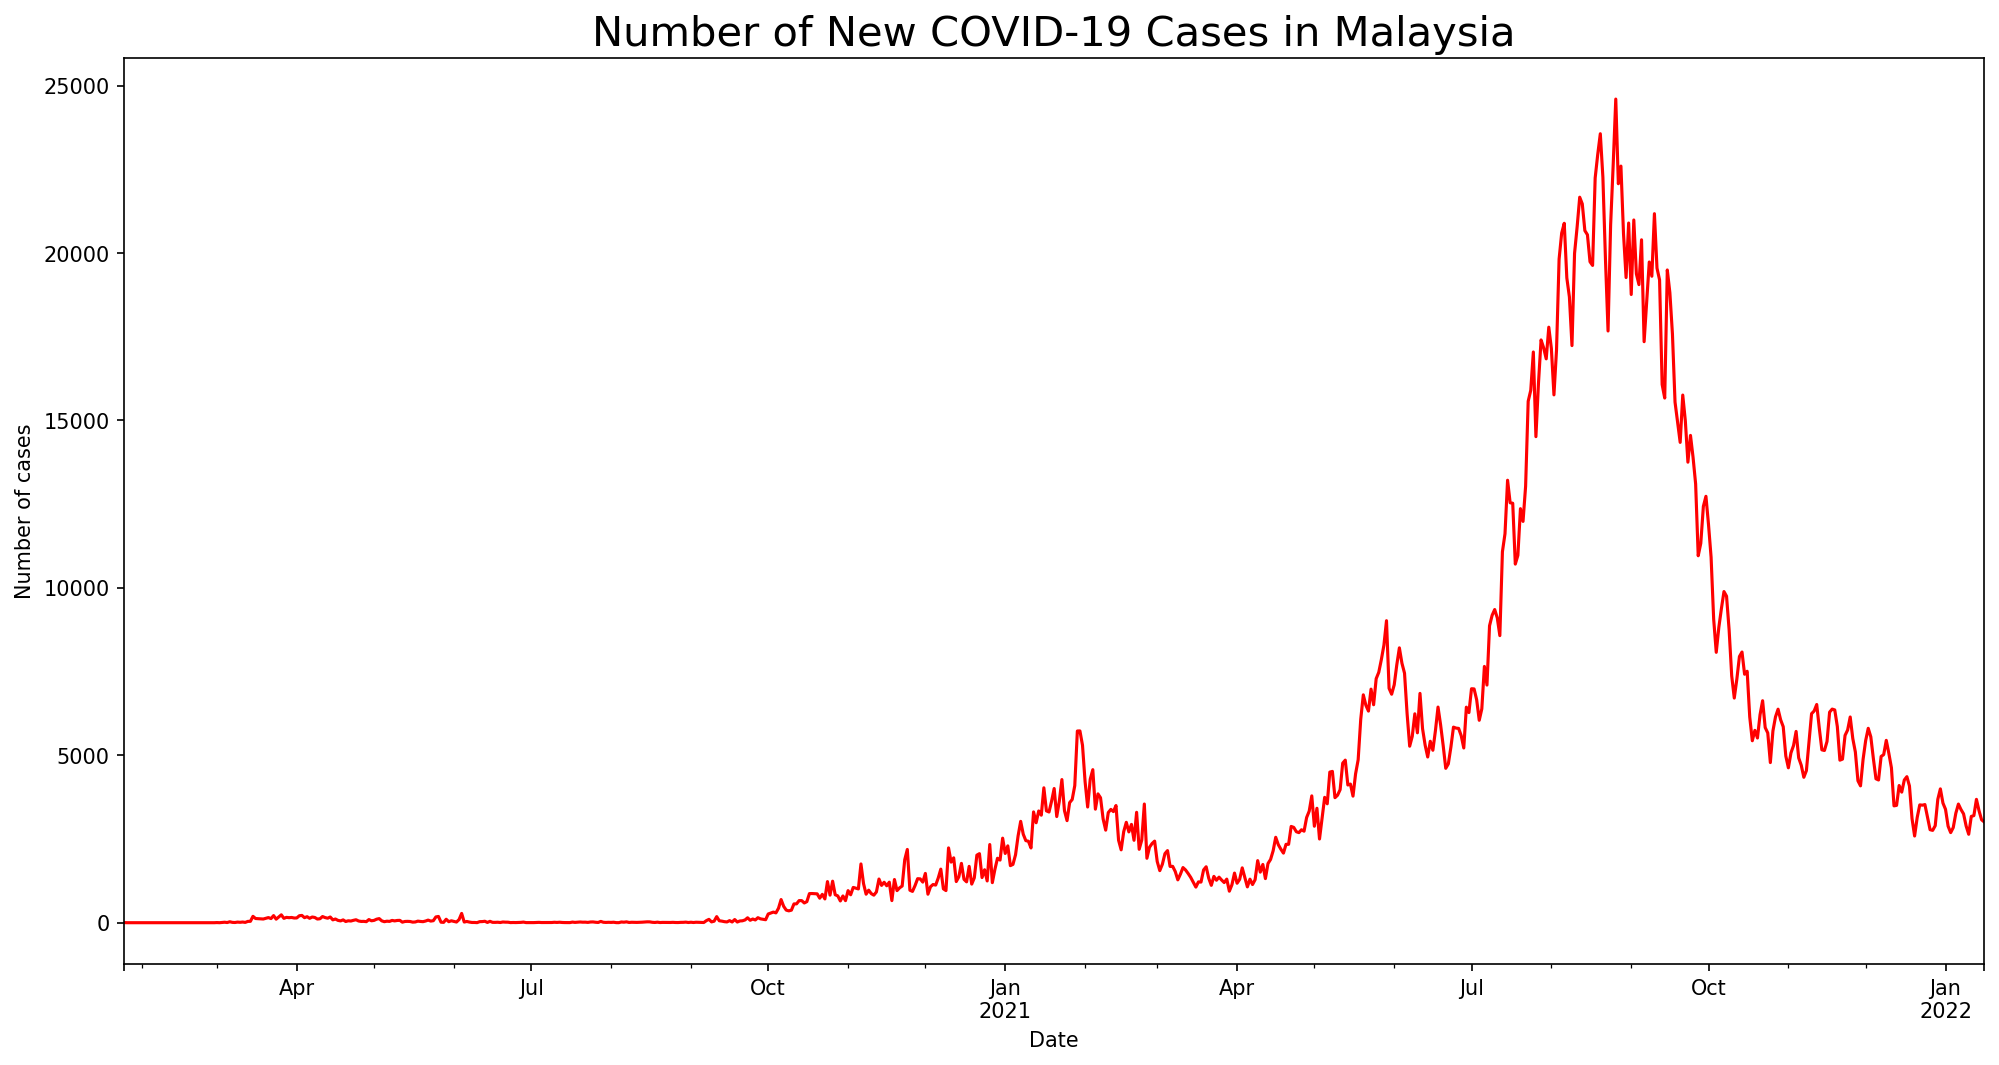

In [5]:
# Overview of case number

plt.figure(figsize=(16, 8), dpi=150)
totalcase['cases_new'].plot (label='Total case', color='red')
plt.title('Number of New COVID-19 Cases in Malaysia', size = '20')
plt.xlabel('Date')
plt.ylabel('Number of cases')

# To be covered by Tajul

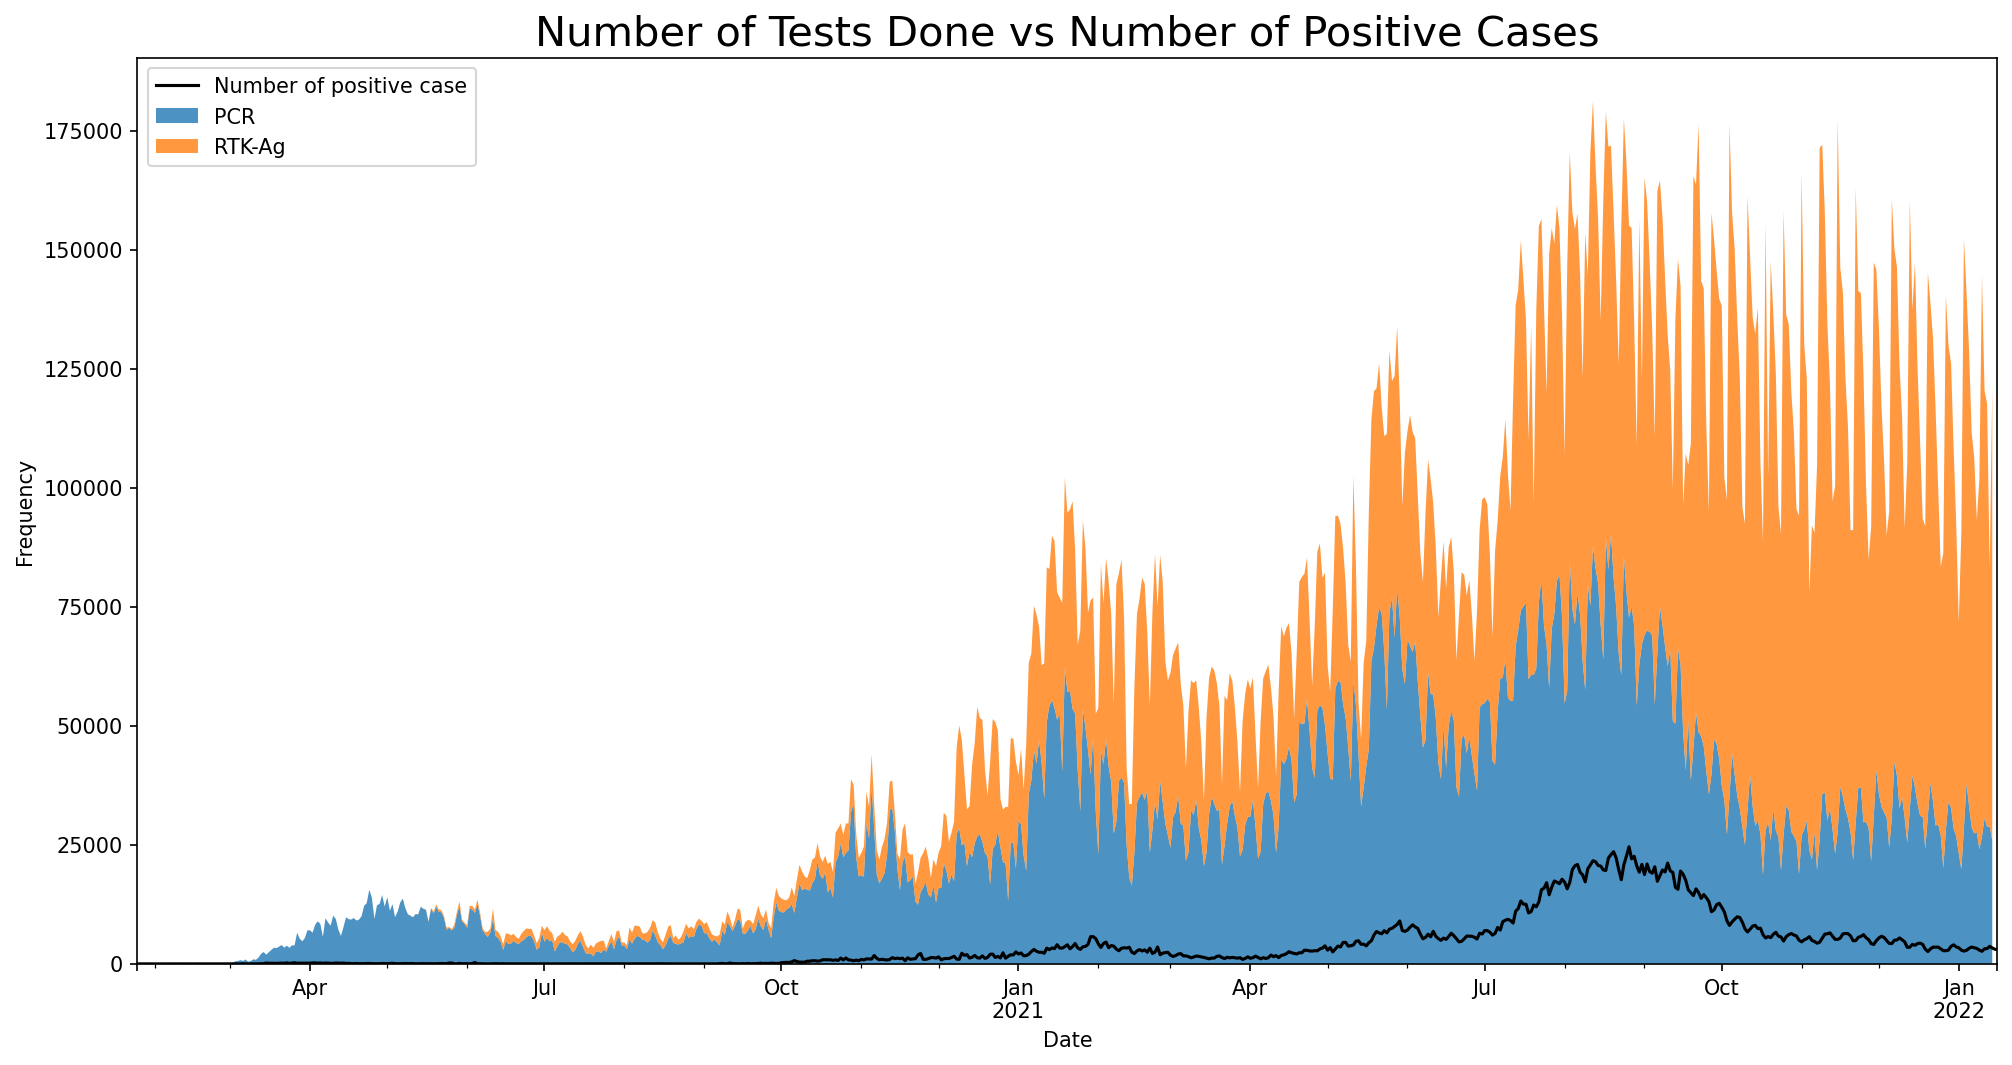

In [6]:
# Number of new cases vs number of tests done
plt.figure(figsize=(16, 8), dpi=150)
plt.stackplot(totaltest.index,
              [totaltest['pcr'], totaltest['rtk-ag']],
              labels= ['PCR', 'RTK-Ag'],
              alpha=0.8)
totalcase['cases_new'].plot (label='Number of positive case', color = 'black')
plt.title('Number of Tests Done vs Number of Positive Cases', size = '20')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend(loc=2)

# To be covered by Tajul

Text(0, 0.5, 'Frequency')

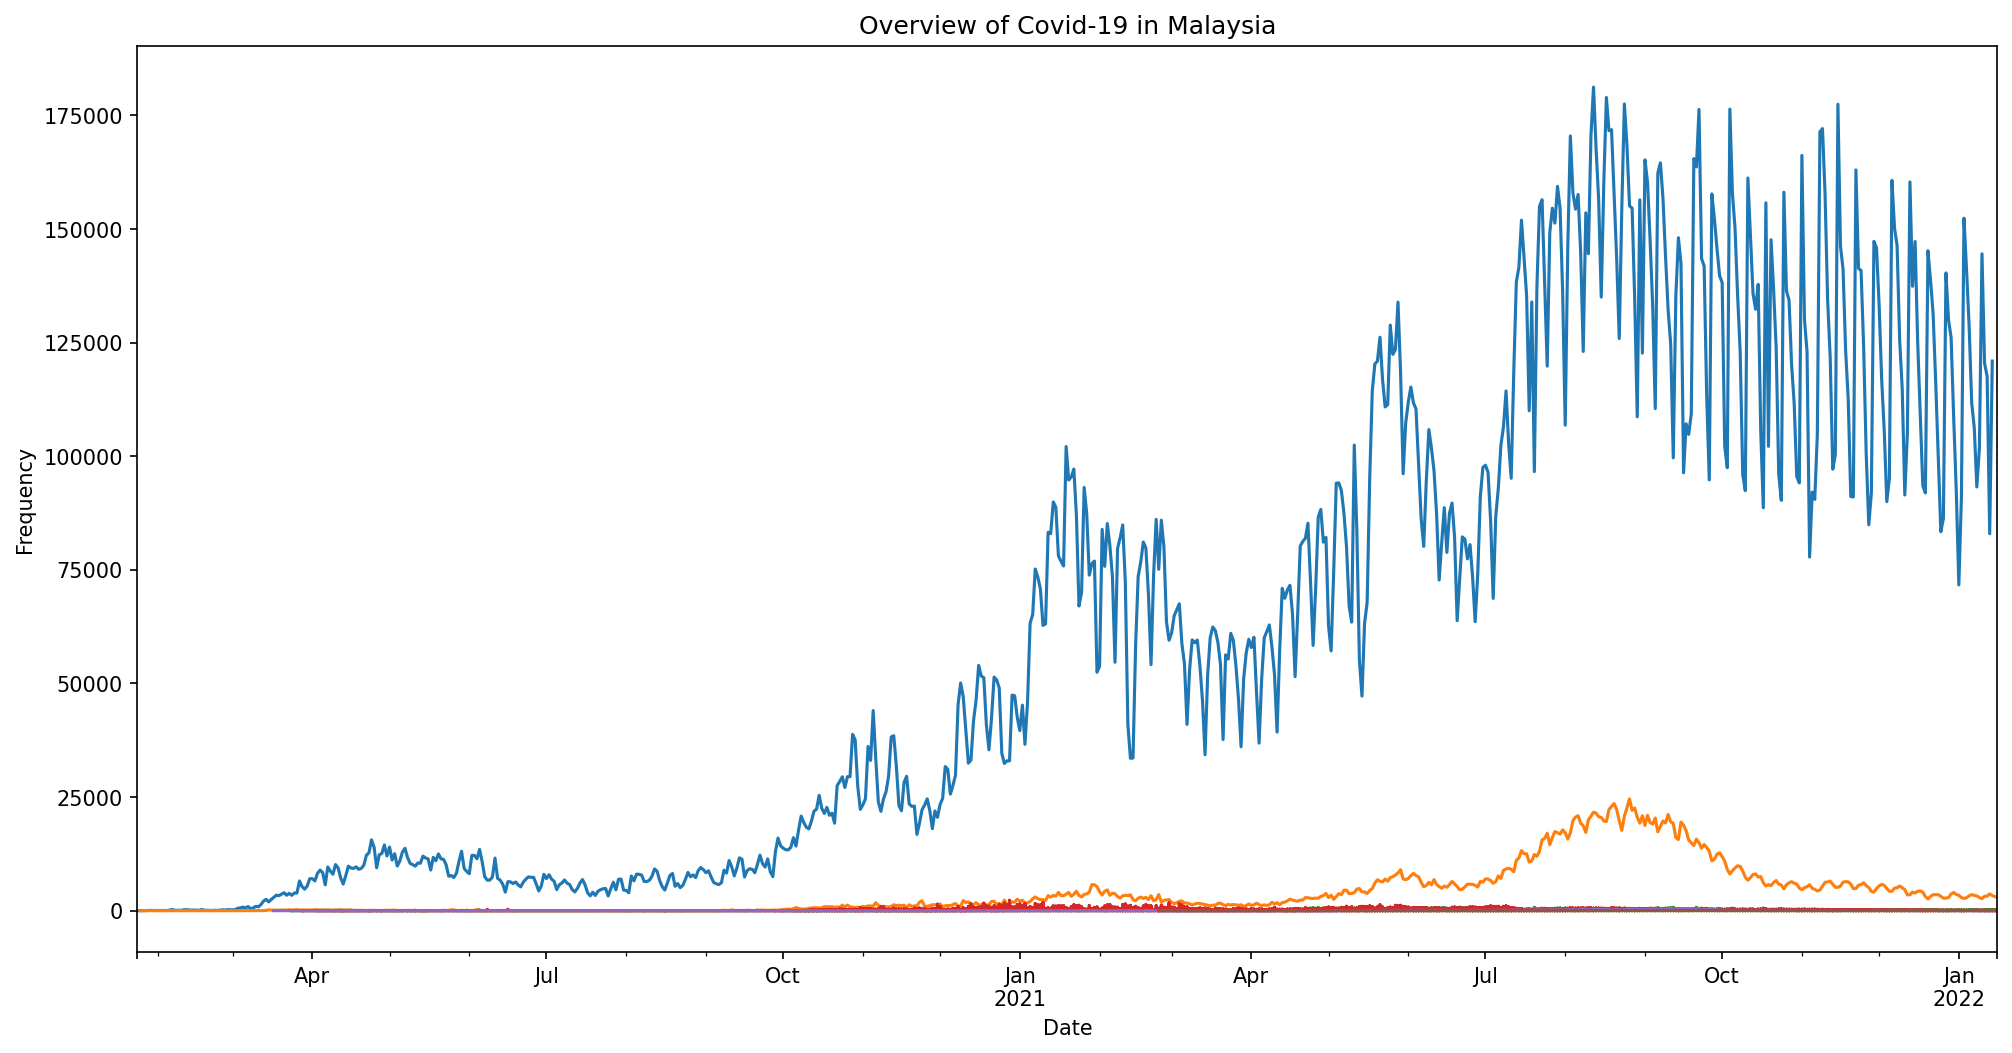

In [7]:
# Overview of COVID situation in Malaysia. To compare various parameters.

# Find total number of daily tests (total of both PCR & RTK-Ag)
totaltest ['dailytest'] = totaltest ['pcr'] + totaltest ['rtk-ag']
vaccinatedpercentage = vax['cumul_full']/ 32657400 * 100 #32657400 is the Malaysian population, figure taken from the population dataset

# Plot the chart

plt.figure(figsize=(16, 8), dpi=150)
totaltest['dailytest'].plot ()
totalcase['cases_new'].plot ()
hospital['discharged_total'].plot ()
pkrc['discharged_total'].plot ()
totaldeath['deaths_new'].plot ()
vaccinatedpercentage.plot ()

# Add labels
plt.title ('Overview of Covid-19 in Malaysia')
plt.xlabel ('Date')
plt.ylabel ('Frequency')

# Need to use different scales for different parameters.

Text(0.5, 0, 'Date')

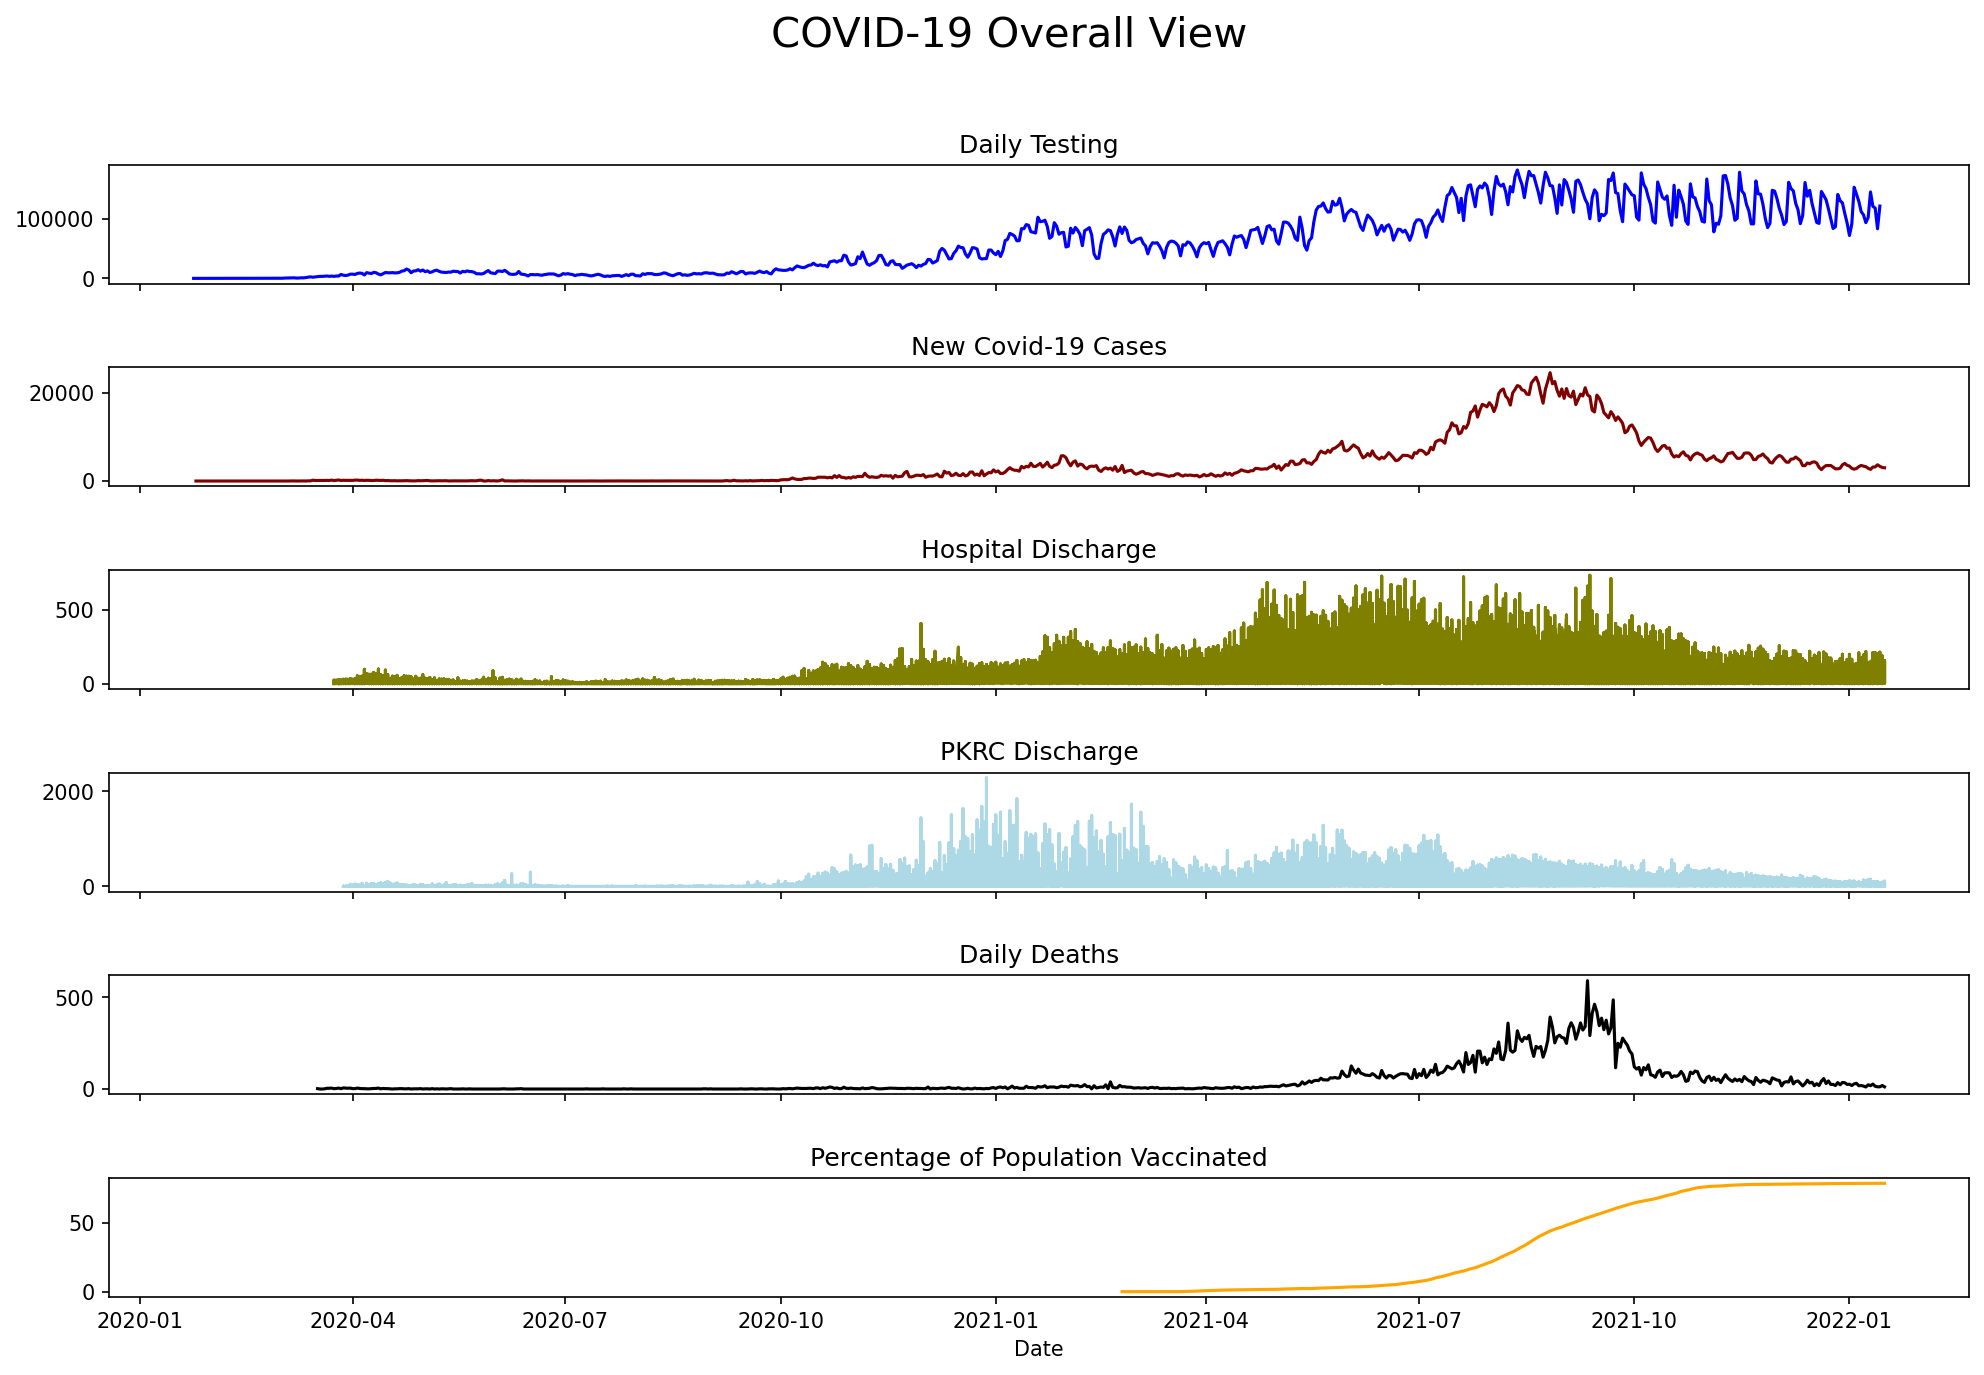

In [8]:
# Overview of COVID situation in Malaysia. To compare various parameters.
# How to compare different charts to assess trends when different datasets have different range of y-value.

# Find total number of daily tests (total of both PCR & RTK-Ag)
totaltest ['dailytest'] = totaltest ['pcr'] + totaltest ['rtk-ag']
vaccinatedpercentage = vax['cumul_full']/ 32657400 * 100 #32657400 is the Malaysian population, figure taken from the population dataset

# Stack plots on top of another to compare pattern since each chart use different scales.
fig = plt.figure(figsize=(16, 10), dpi=150)
gs = fig.add_gridspec(6, hspace=0.7)
axs = gs.subplots(sharex=True)
fig.suptitle('COVID-19 Overall View', fontsize=20)

axs[0].plot(totaltest['dailytest'], color = 'blue')
axs[0].set_title("Daily Testing")

axs[1].plot(totalcase['cases_new'], color = 'maroon')
axs[1].set_title("New Covid-19 Cases")

axs[2].plot(hospital['discharged_total'], color = 'olive')
axs[2].set_title("Hospital Discharge")

axs[3].plot(pkrc['discharged_total'], color = 'lightblue')
axs[3].set_title("PKRC Discharge")

axs[4].plot(totaldeath['deaths_new'], color = 'black')
axs[4].set_title("Daily Deaths")

axs[5].plot(vaccinatedpercentage, color = 'orange')
axs[5].set_title("Percentage of Population Vaccinated")

plt.xlabel ("Date")

Text(0.5, 1.0, 'Percentage of Population Vaccinated')

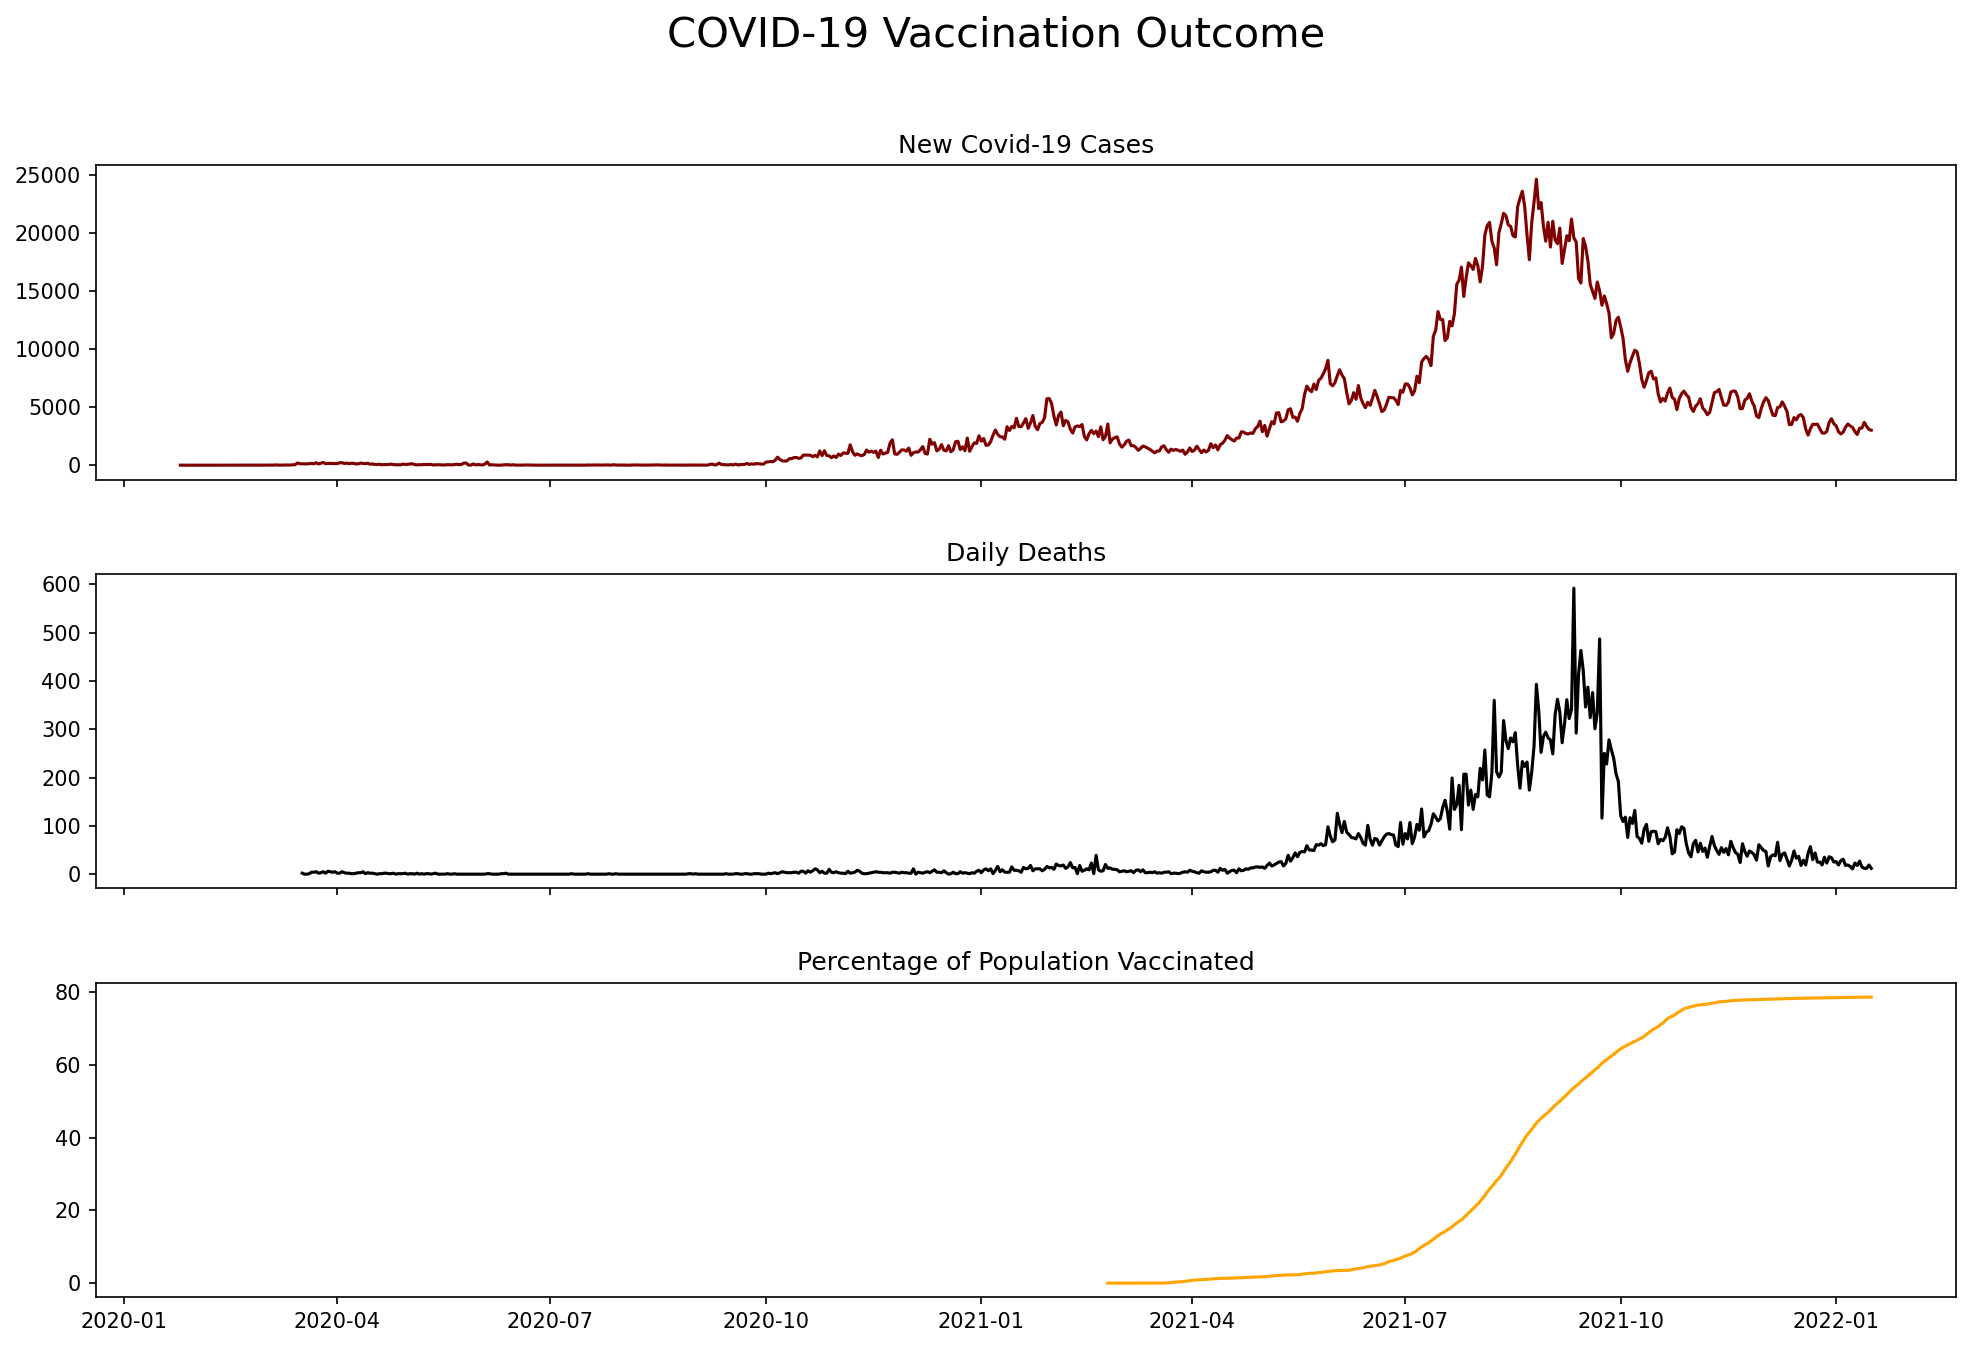

In [9]:
# cases vs deaths vs vaccination

fig = plt.figure(figsize=(16, 10), dpi=150)
gs = fig.add_gridspec(3, hspace=0.3)
axs = gs.subplots(sharex=True)
fig.suptitle('COVID-19 Vaccination Outcome', fontsize=20)

axs[0].plot(totalcase['cases_new'], color = 'maroon')
axs[0].set_title("New Covid-19 Cases")

axs[1].plot(totaldeath['deaths_new'], color = 'black')
axs[1].set_title("Daily Deaths")

axs[2].plot(vaccinatedpercentage, color = 'orange')
axs[2].set_title("Percentage of Population Vaccinated")

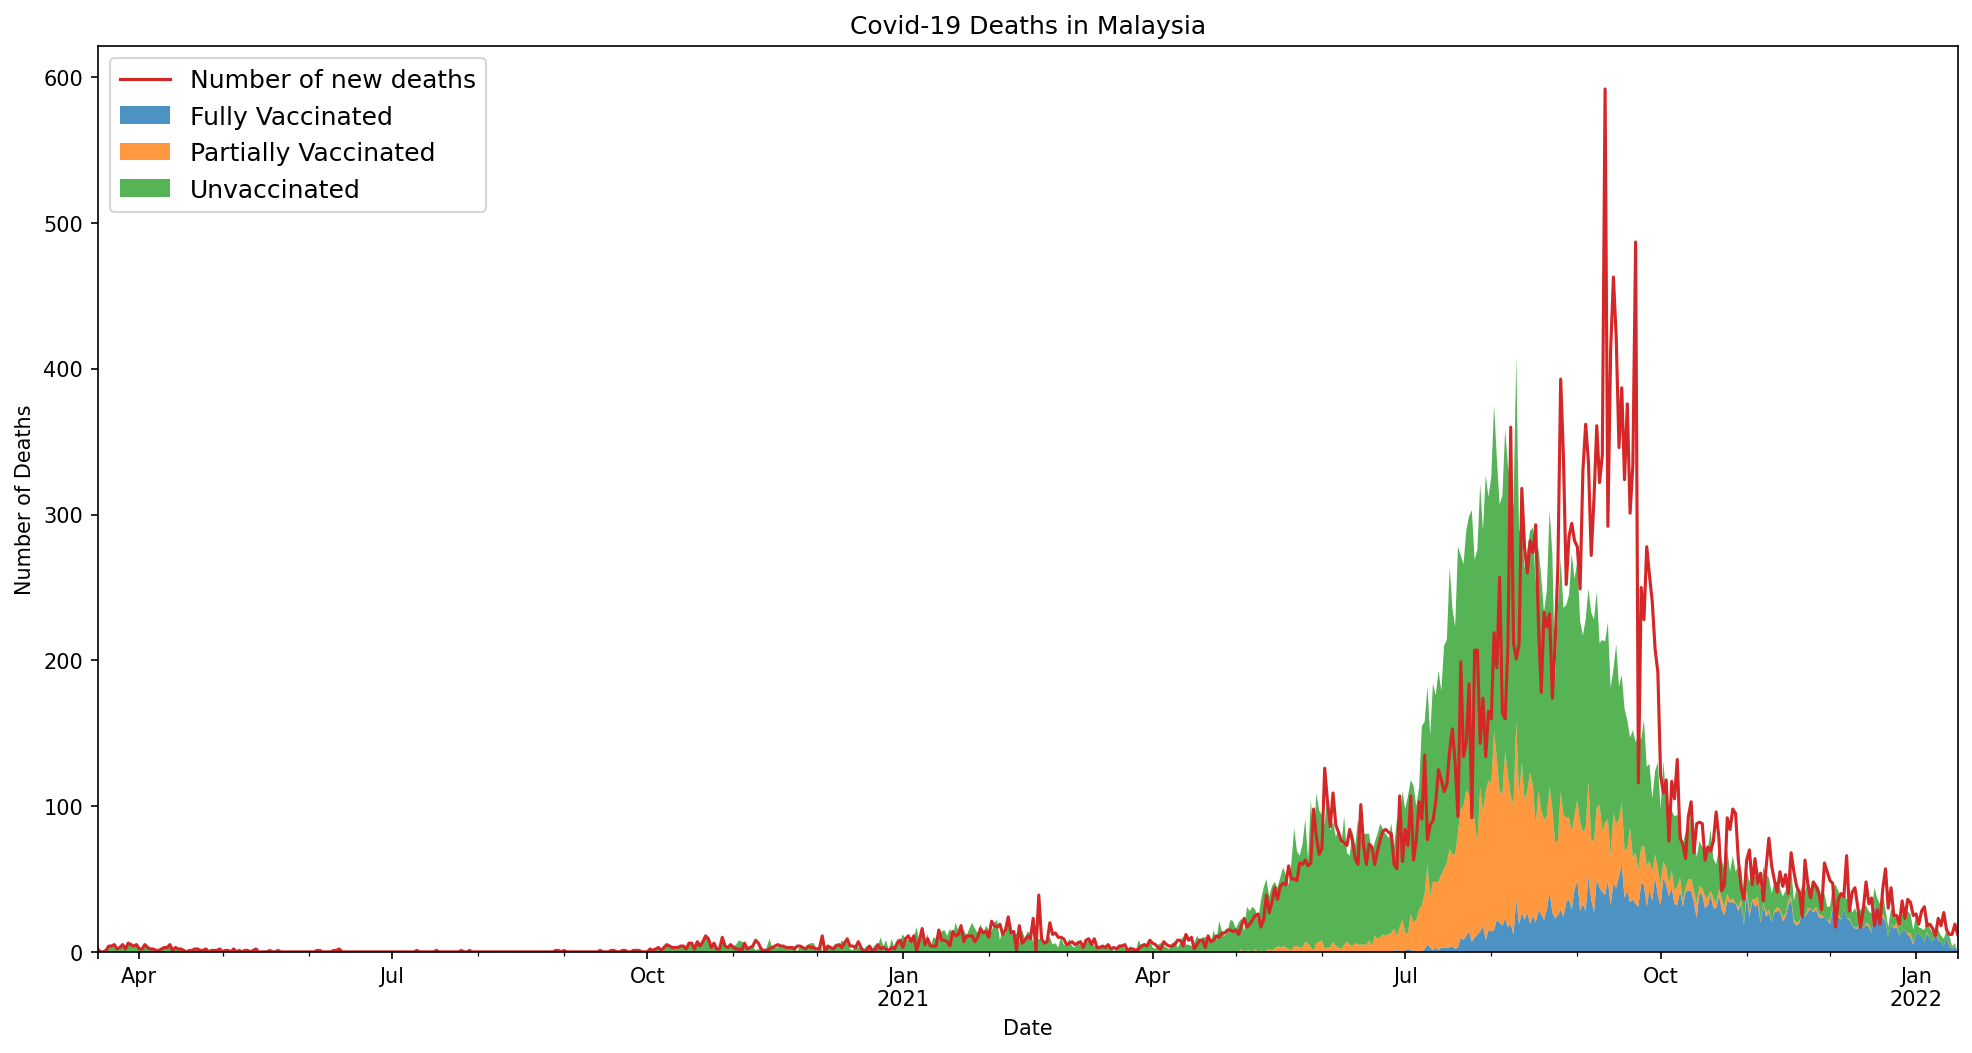

In [10]:
# Overview of number of deaths due to Covid-19 in Malaysia
plt.figure(figsize=(16, 8), dpi=150)
plt.stackplot(totaldeath.index,
              [totaldeath['deaths_fvax'], totaldeath['deaths_pvax'],
               totaldeath['deaths_unvax']],
              labels=['Fully Vaccinated', 'Partially Vaccinated', 'Unvaccinated'],
              alpha=0.8)
totaldeath['deaths_new'].plot (label = "Number of new deaths")

# Add labels
plt.title ('Covid-19 Deaths in Malaysia')
plt.ylabel ('Number of Deaths')
plt.xlabel ('Date')
plt.legend(loc=2, fontsize='large')
plt.show()

# Discrepancy in the graph is probably due to backlog of death announcement. 
# The data for the red line was done based on date of announcement of death.
# Categorisation on vaccination status was corrected to the actual day of death.
# Lots of delayed announcement

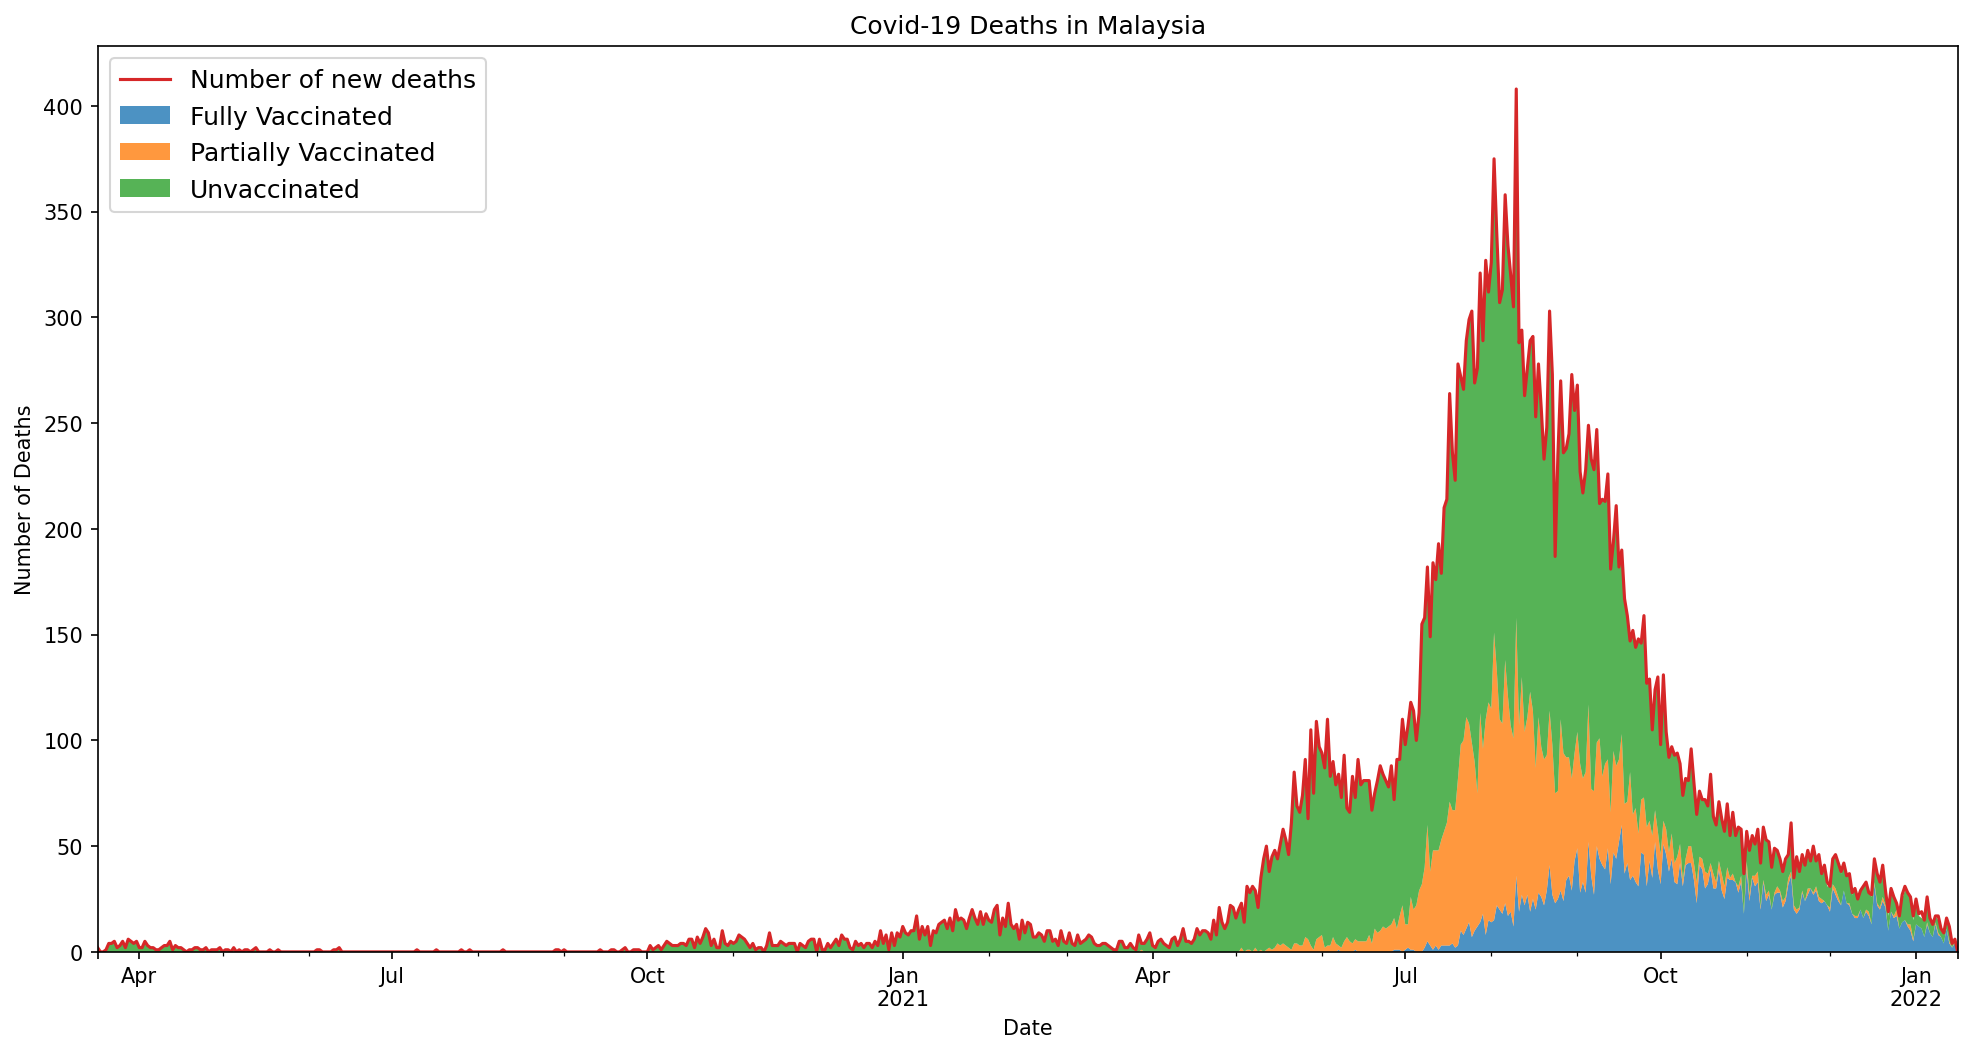

In [11]:
# Overview of number of deaths due to Covid-19 in Malaysia
plt.figure(figsize=(16, 8), dpi=150)
plt.stackplot(totaldeath.index,
              [totaldeath['deaths_fvax'], totaldeath['deaths_pvax'],
               totaldeath['deaths_unvax']],
              labels=['Fully Vaccinated', 'Partially Vaccinated', 'Unvaccinated'],
              alpha=0.8)
totaldeath['deaths_new_dod'].plot (label = "Number of new deaths")

# Add labels
plt.title ('Covid-19 Deaths in Malaysia')
plt.ylabel ('Number of Deaths')
plt.xlabel ('Date')
plt.legend(loc=2, fontsize='large')
plt.show()


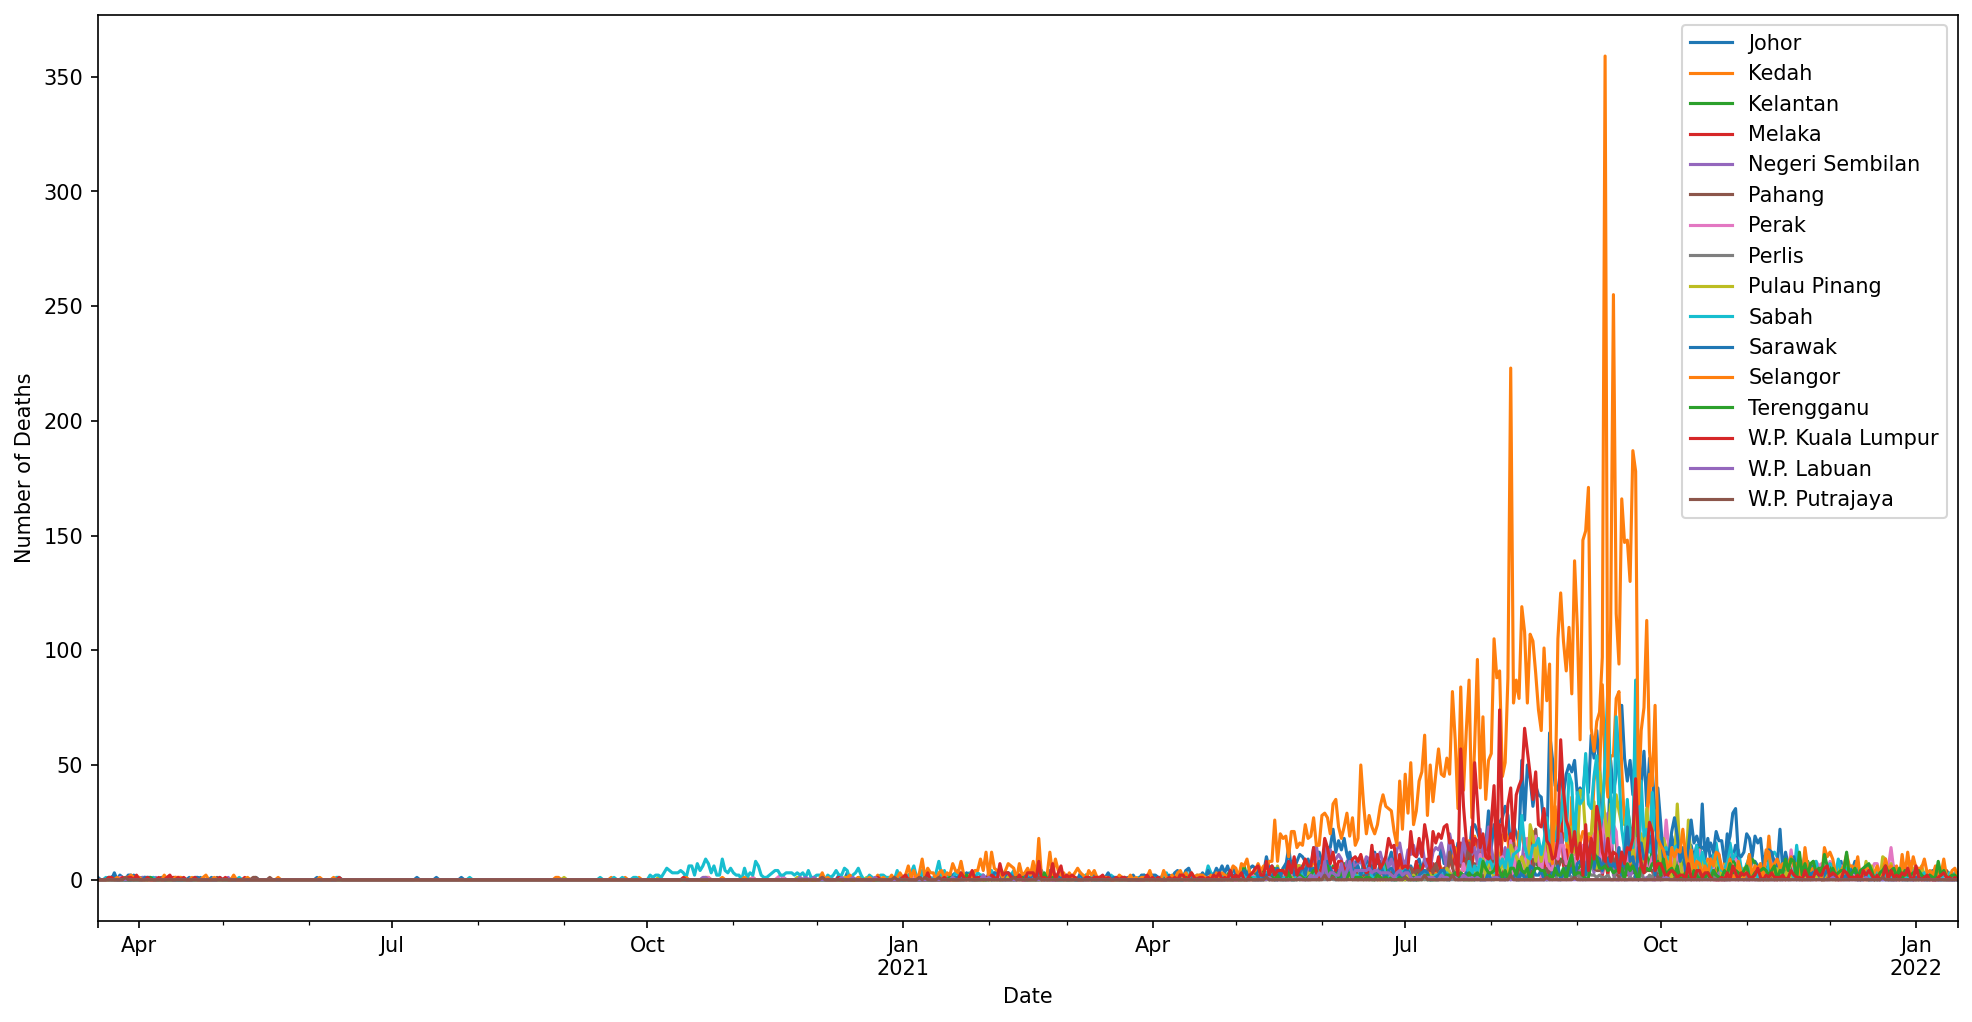

In [12]:
# Deaths according to state.
plt.figure(figsize=(16, 8), dpi=150)
deathbystate.groupby('state')['deaths_new'].plot(legend='True')
plt.ylabel ('Number of Deaths')
plt.xlabel ('Date')
plt.show()

# Different disease burden in different states.

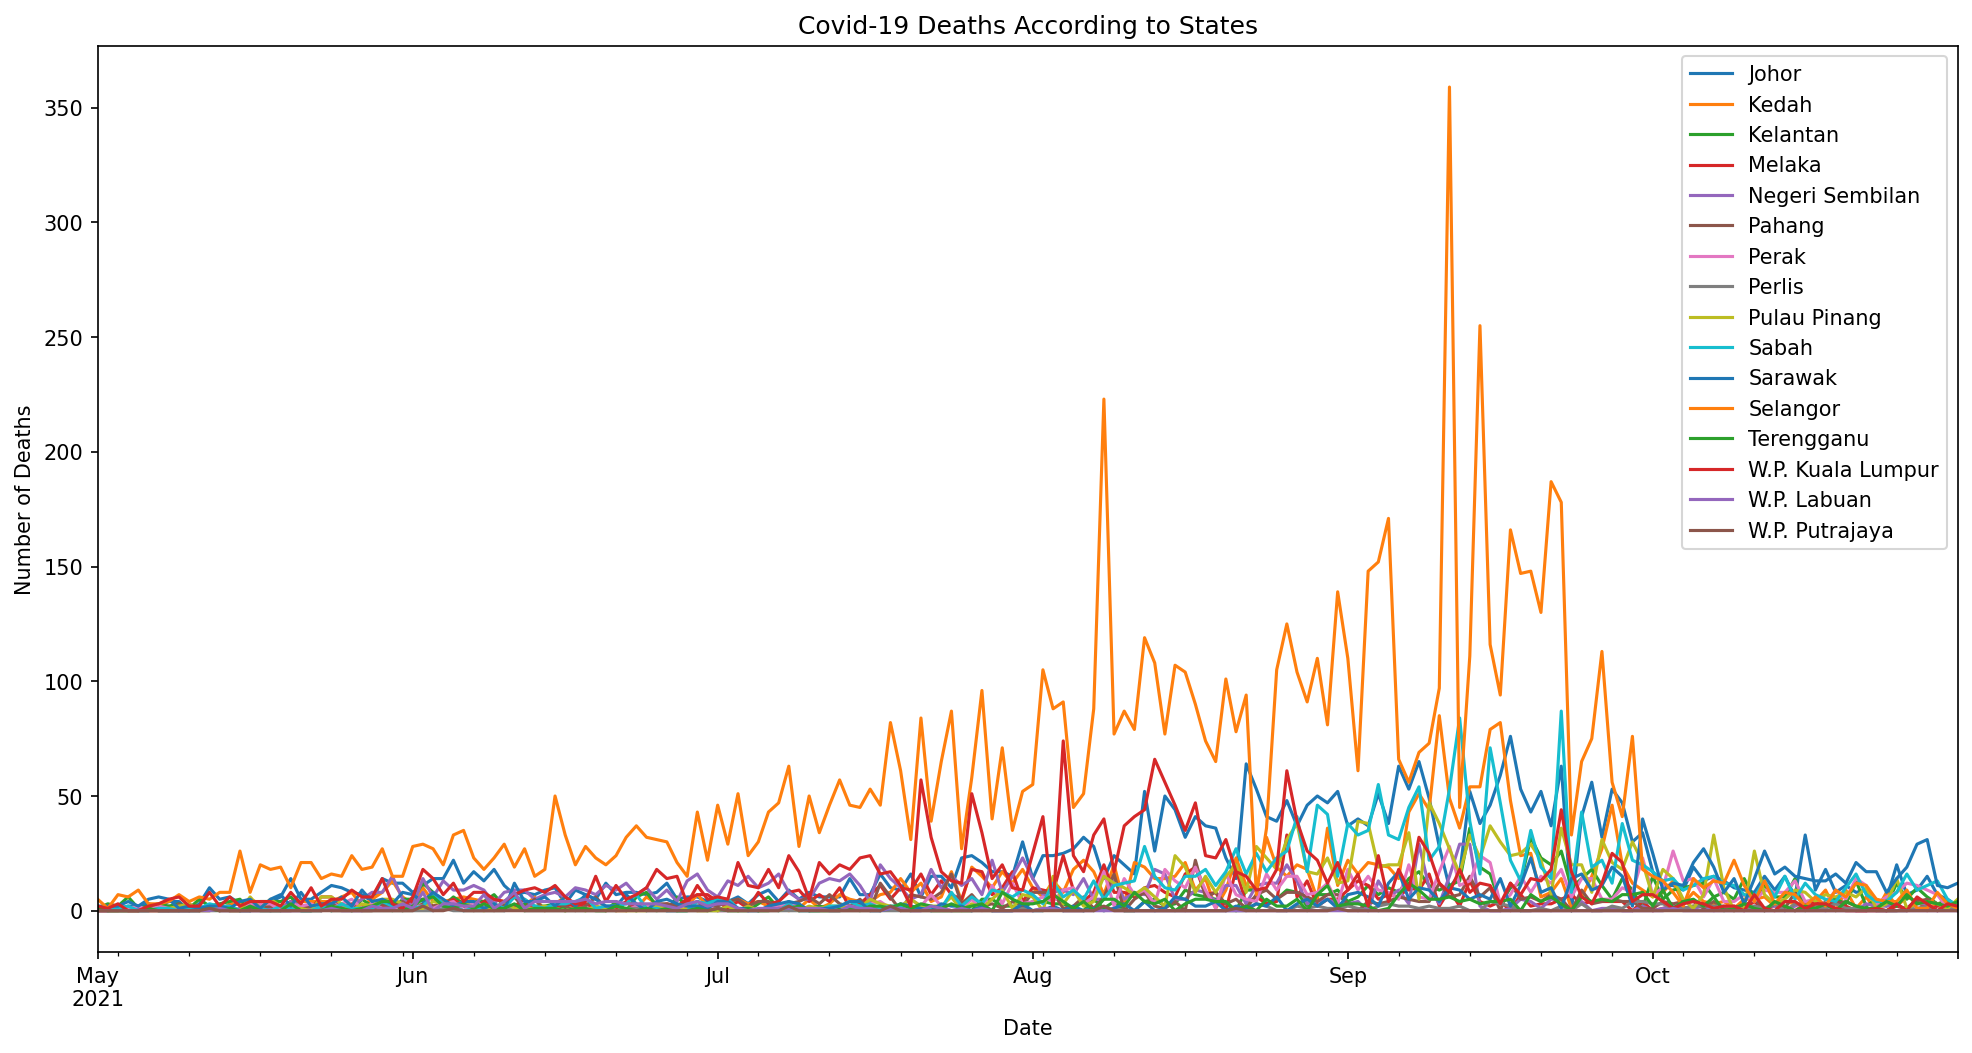

In [13]:
# Deaths according to state but focusing during mid 2021 surge to see the discrepancy between different states.
plt.figure(figsize=(16, 8), dpi=150)
deathwave = deathbystate['2021-05-01' : '2021-10-31']
deathwave.groupby('state')['deaths_new'].plot(legend='True')

#Add labels
plt.title ('Covid-19 Deaths According to States')
plt.ylabel ('Number of Deaths')
plt.xlabel ('Date')
plt.show()

# Very busy chart.
# Rough observation =  state trend of death doesn't really follow the national trend hence requires a new set of discussion.
# Perhaps number of cases is better in arguing disease burden distribution varies during the surge.

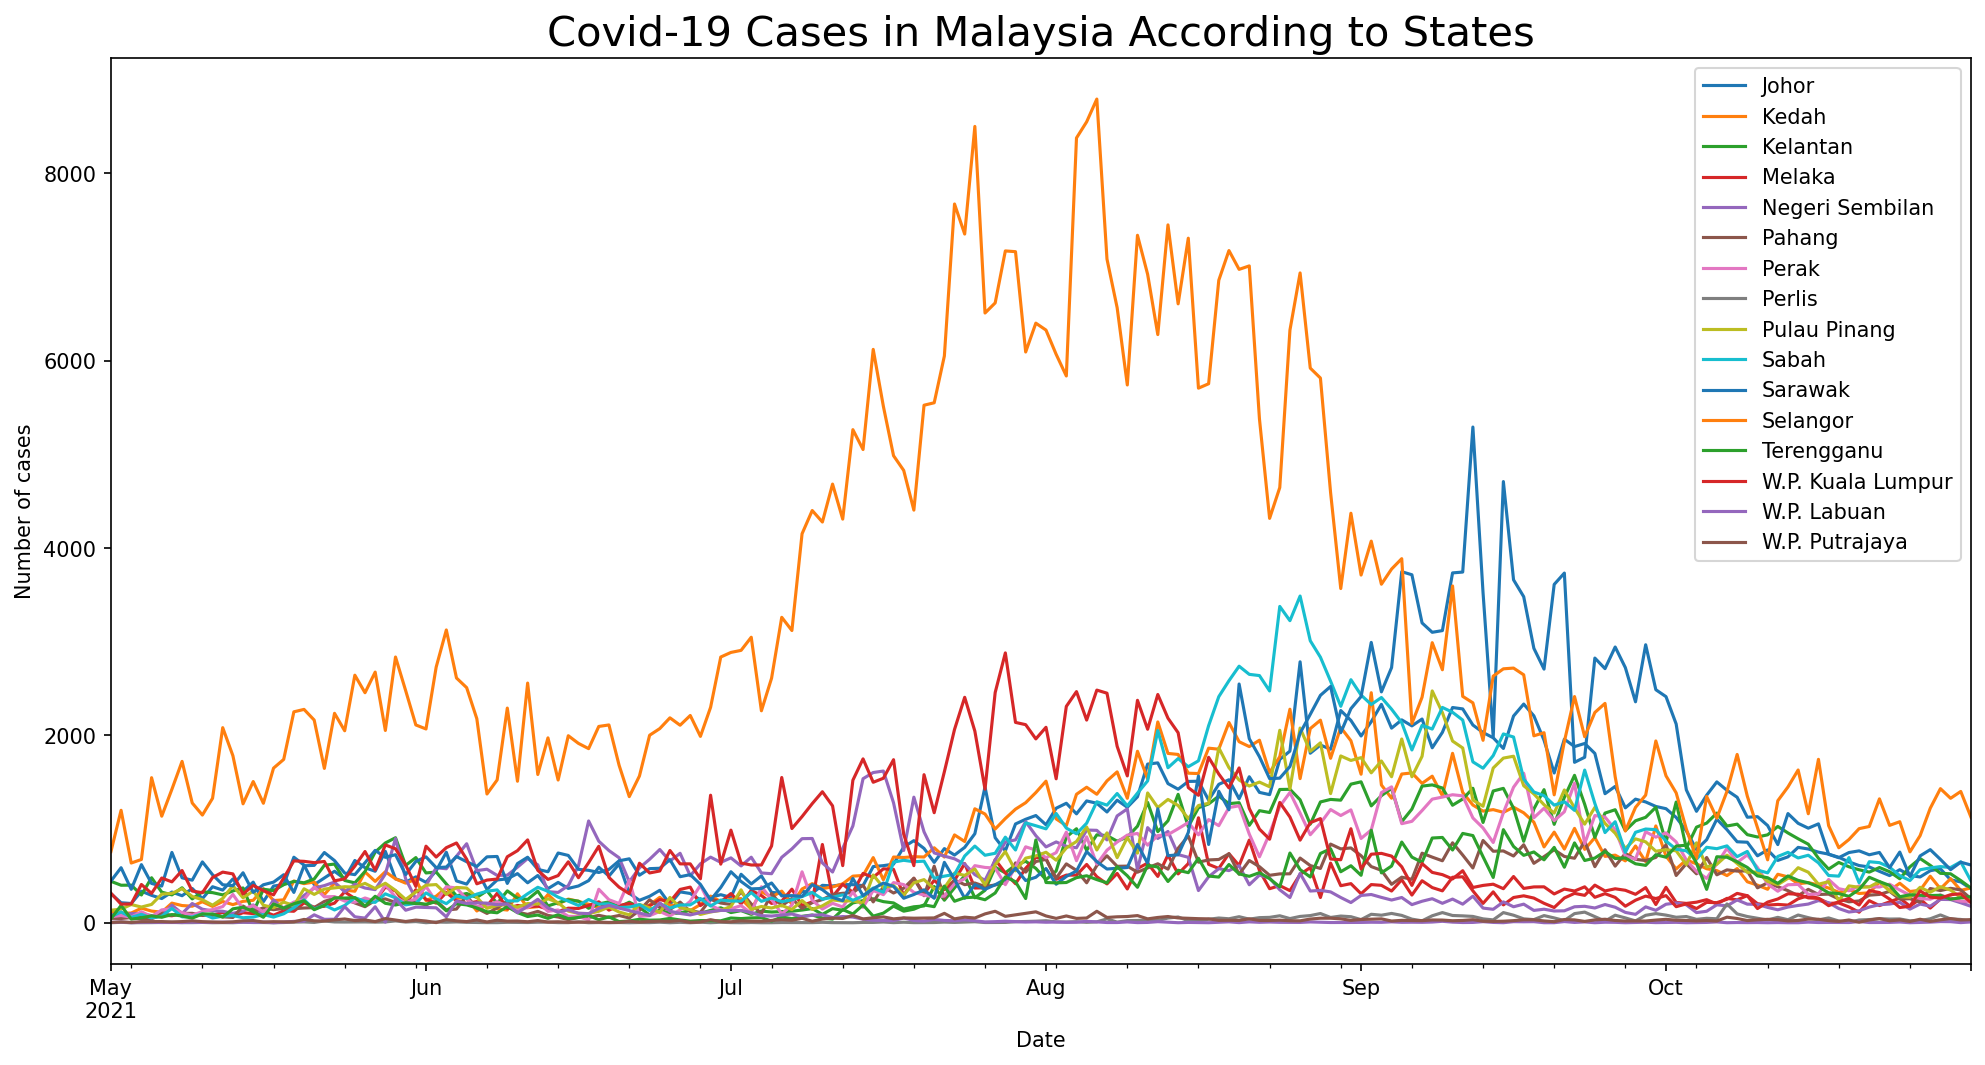

In [14]:
# Number of cases according to state but focusing during mid 2021 surge to see the discrepancy between different states.

# Set plot area
plt.figure(figsize=(16, 8), dpi=150)

# Set time frame
casewave = casebystate['2021-05-01' : '2021-10-31']

# Group data by states
casewave.groupby('state')['cases_new'].plot(legend='True')

# Add labels
plt.title ("Covid-19 Cases in Malaysia According to States", size = 20)
plt.xlabel ('Date')
plt.ylabel ('Number of cases')
plt.show()

# More reflective of the daily number of cases since it is the same parameter. 
# Use this in final report as visualisation of different range.

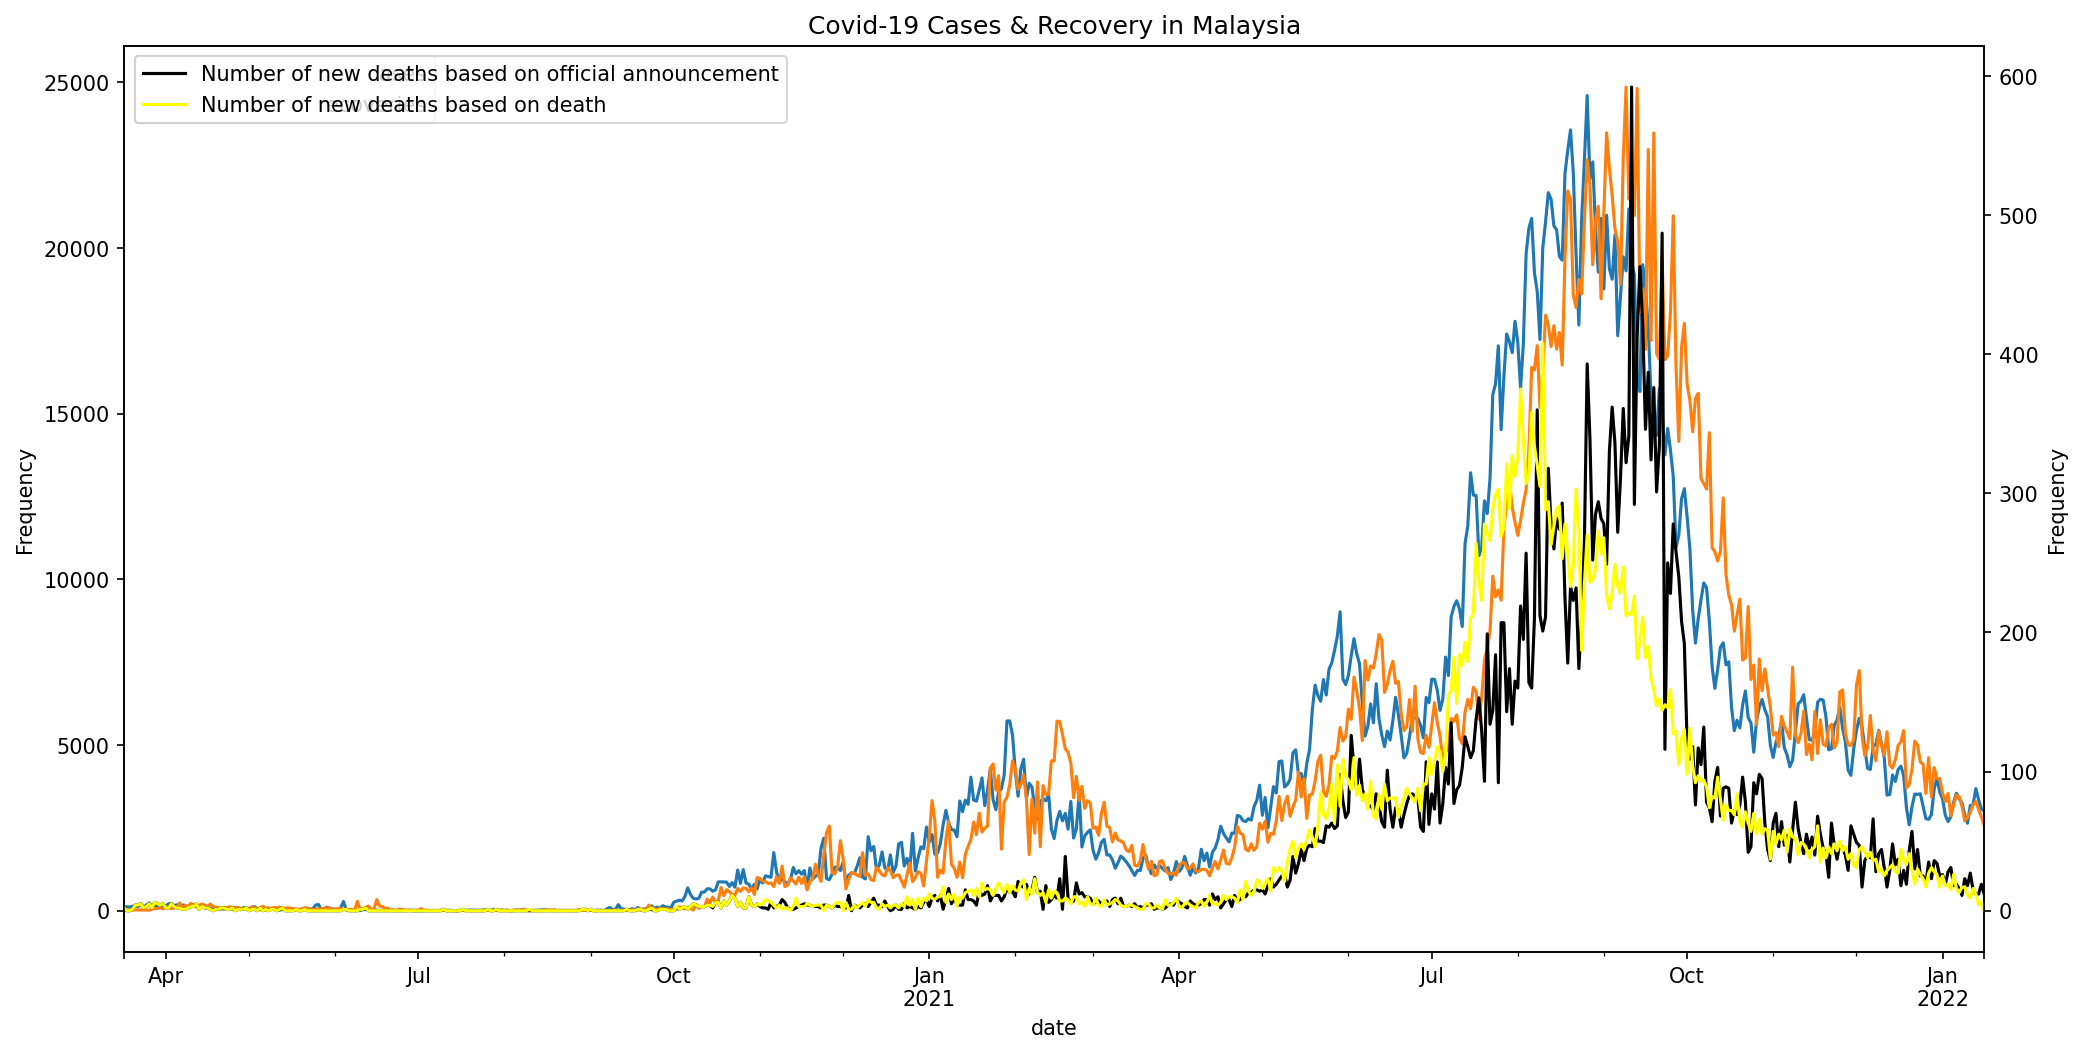

In [15]:
# Were there excessive deaths? 
# Plot new cases, recoveries & death.

fig, ax = plt.subplots(figsize=(16, 8), dpi=150)
totalcase['cases_new'].plot (label='Number of new cases')
totalcase ['cases_recovered'].plot (label = "Number of recoveries")
plt.ylabel ('Frequency')
plt.legend(loc=2)

ax = ax.twinx() #plot on a different scale for the purpose of pattern comparison
totaldeath['deaths_new'].plot (label = "Number of new deaths based on official announcement", color = 'black', legend = True) #based on announcement date
totaldeath['deaths_new_dod'].plot (label = "Number of new deaths based on death", color = 'yellow', legend = True) #Based on actual day of death

plt.title ('Covid-19 Cases & Recovery in Malaysia')
plt.xlabel ('Date')
plt.ylabel ('Frequency')
plt.show()

# Big difference in the official number of deaths vs actual day of death. Backlog in announcement. Why?
# Use official number of death for report since that's the officially announced number.
# Consider analysing deaths_tat for median days between date of death and date of report for all deaths reported on the day if need more report material.

In [16]:
msiacase = totalcase ['cases_new'].sum()
msiacase

2808347

In [17]:
msiadeath = totaldeath ['deaths_new'].sum()
msiadeath

31793

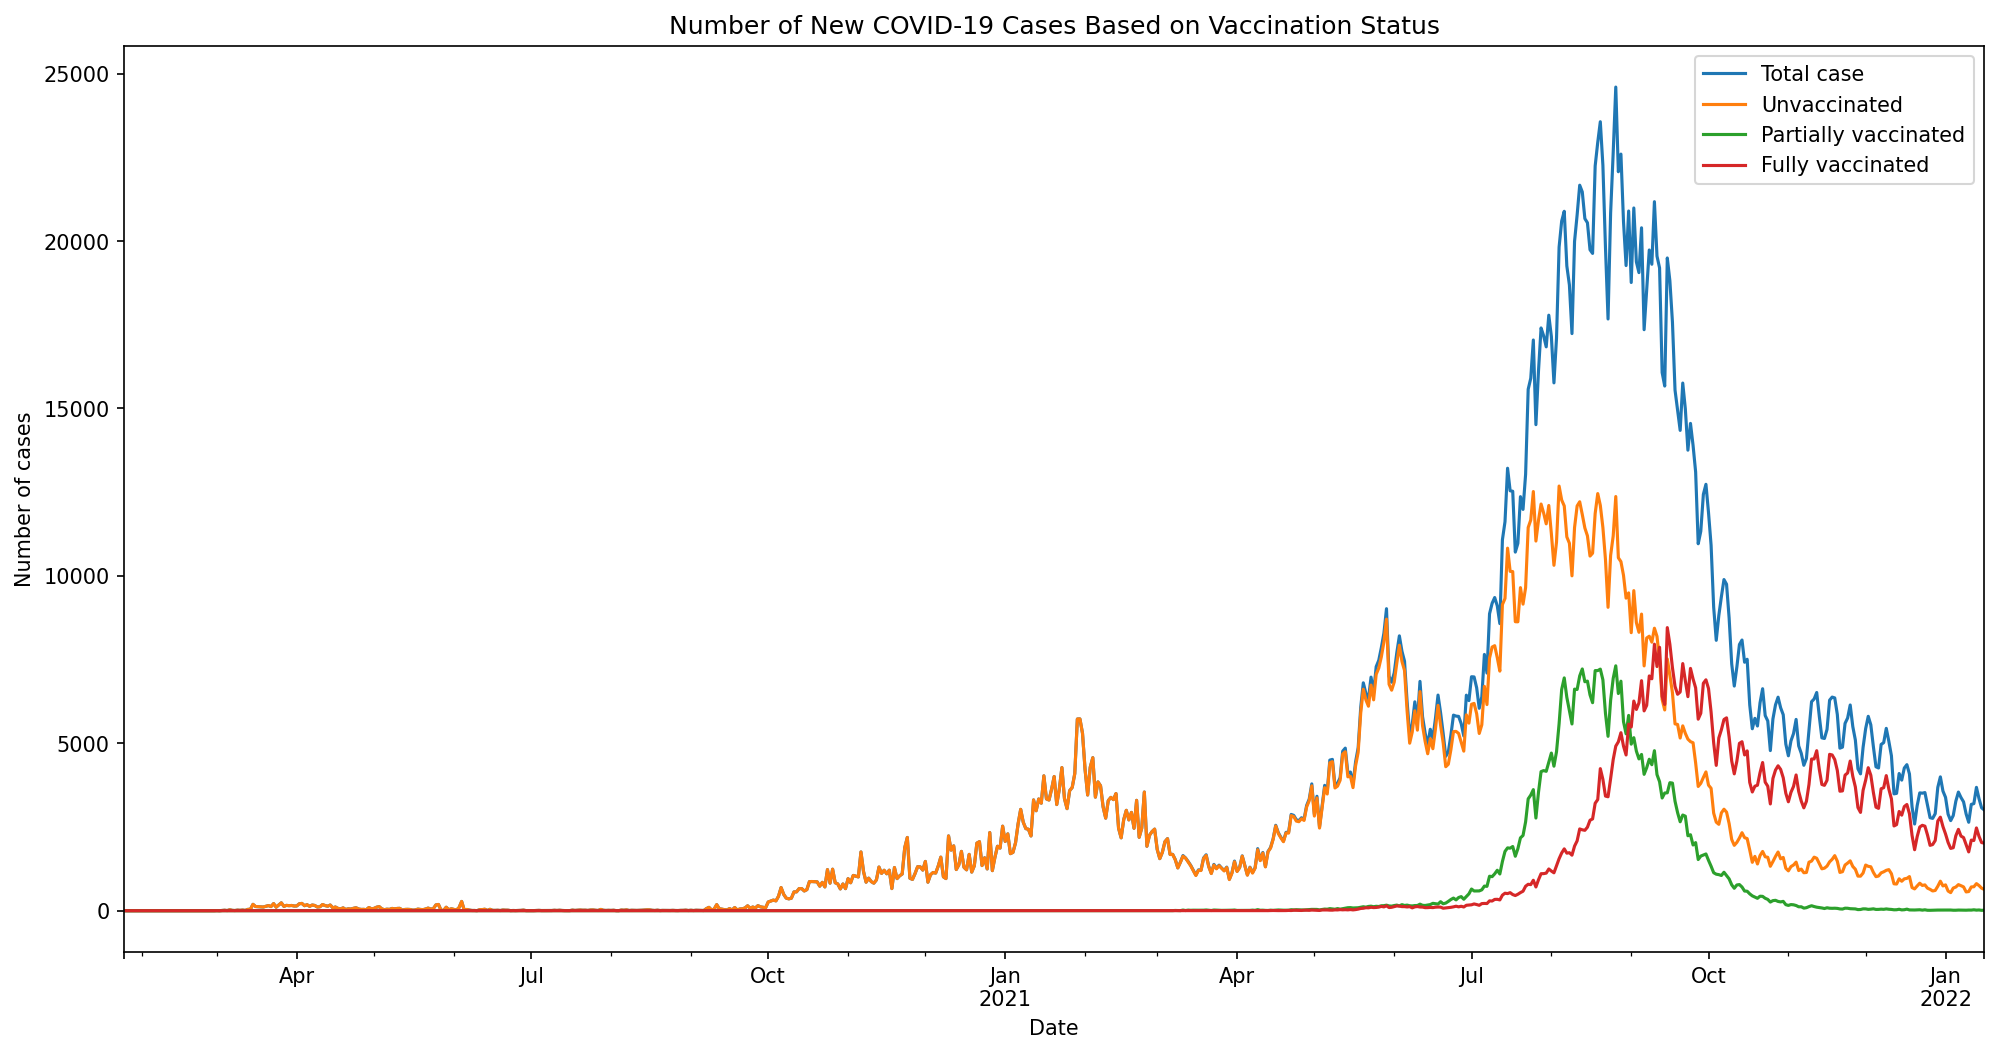

In [18]:
# Cases based on vaccination status
plt.subplots (figsize=(16, 8), dpi=150)
totalcase['cases_new'].plot(label='Total case')
totalcase['cases_unvax'].plot(label='Unvaccinated')
totalcase['cases_pvax'].plot(label='Partially vaccinated')
totalcase['cases_fvax'].plot(label='Fully vaccinated')
  
plt.title('Number of New COVID-19 Cases Based on Vaccination Status')
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.legend()

# Narrative already covered by Kar Men.

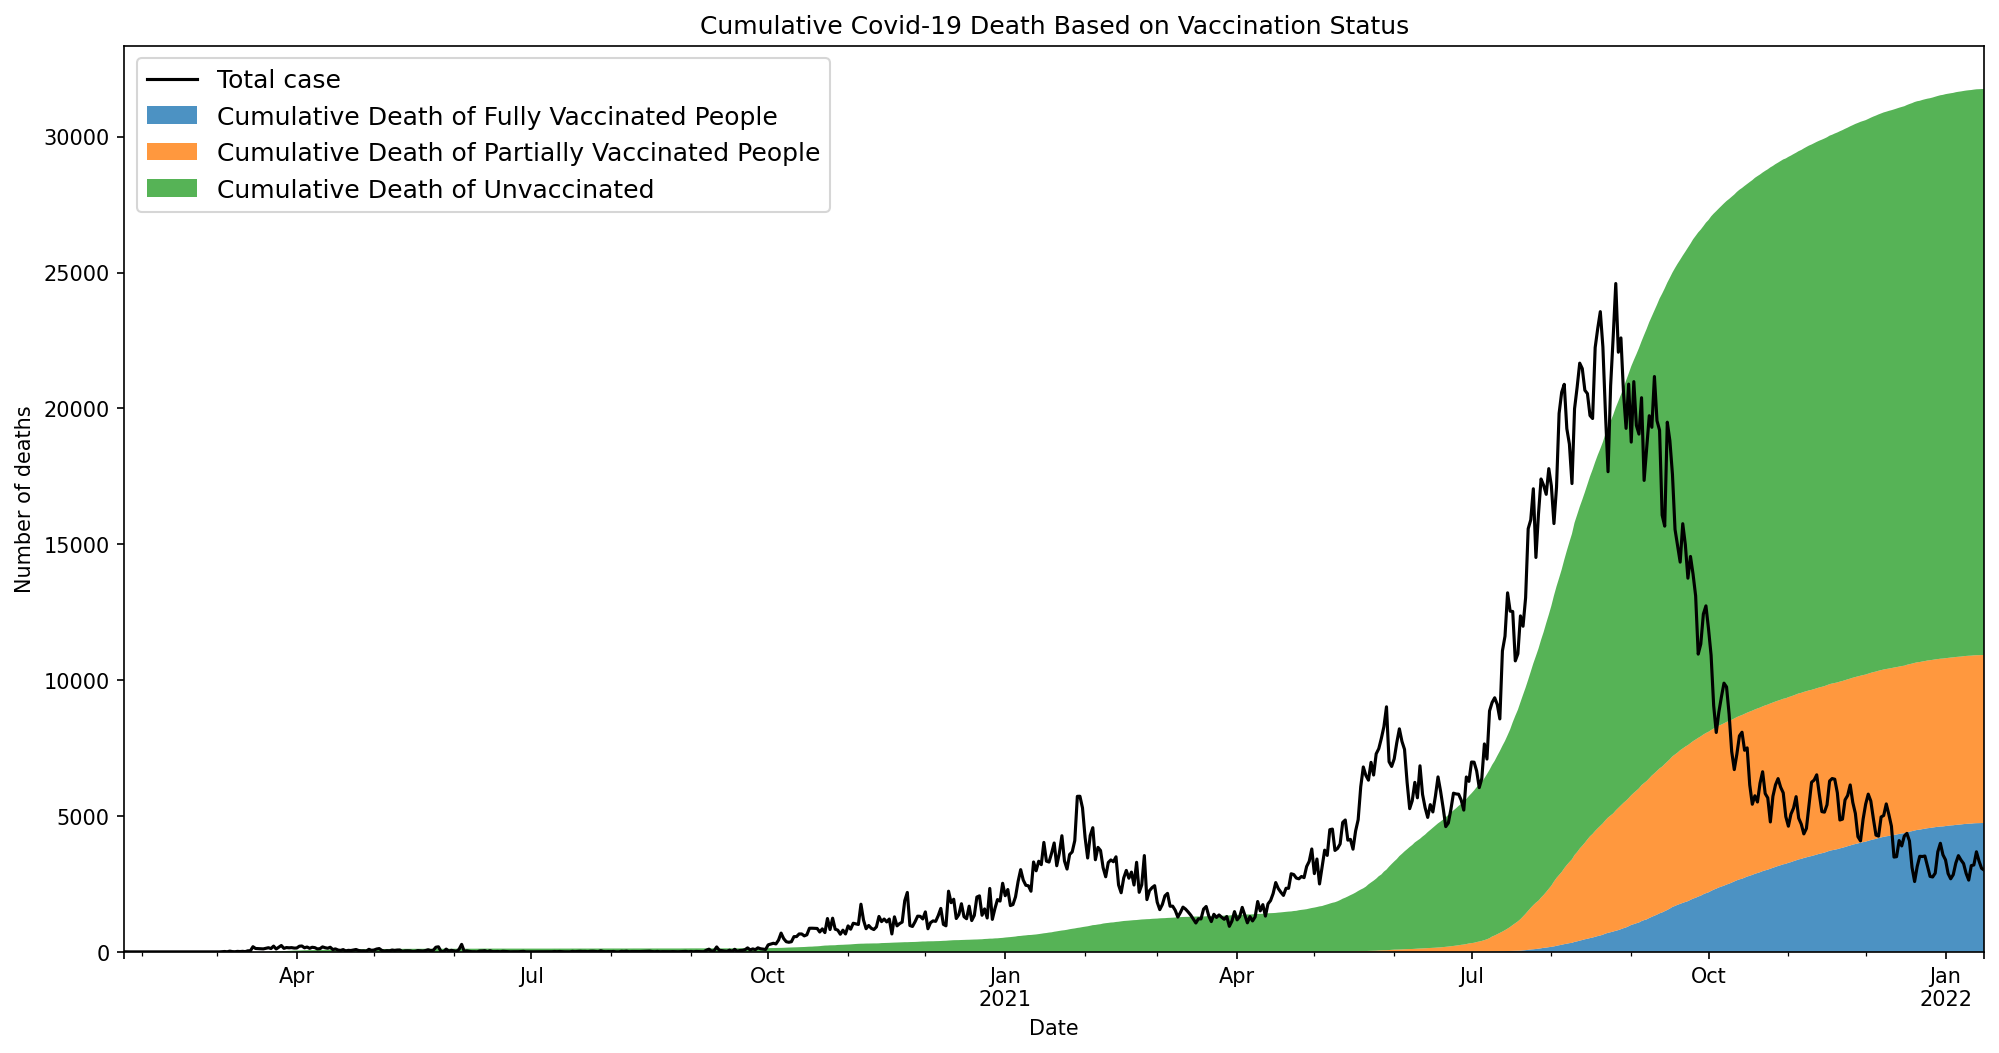

In [19]:
#Finding the proportion of vaccinated people vs unvaccinated people who have died due to Covid

#Create new column on cummulative death
cumsumtot = np.cumsum(totaldeath['deaths_new'])
cumsumfvax = np.cumsum(totaldeath['deaths_fvax'])
cumsumpvax = np.cumsum(totaldeath['deaths_pvax'])
cumsumunvax = np.cumsum(totaldeath['deaths_unvax'])

totaldeath['cumsumtot'] = np.cumsum(totaldeath['deaths_new'])
totaldeath ['cumsumfvax'] = np.cumsum(totaldeath['deaths_fvax'])
totaldeath ['cumsumpvax'] = np.cumsum(totaldeath['deaths_pvax'])
totaldeath ['cumsumunvax'] = np.cumsum(totaldeath['deaths_unvax'])

#Plot chart
plt.figure(figsize=(16, 8), dpi=150)
totalcase['cases_new'].plot(label='Total case', color='black')
plt.stackplot(totaldeath.index,
              [totaldeath['cumsumfvax'], totaldeath['cumsumpvax'],
               totaldeath['cumsumunvax']],
              labels=['Cumulative Death of Fully Vaccinated People', 'Cumulative Death of Partially Vaccinated People', 'Cumulative Death of Unvaccinated'],
              alpha=0.8)

# Add labels
plt.title ('Cumulative Covid-19 Death Based on Vaccination Status')
plt.xlabel ('Date')
plt.ylabel ('Number of deaths')
plt.legend(loc=2, fontsize='large')
plt.show()

# Overview of vaccination rate vs death rate already covered by Kar Men. No need to include in the final report.

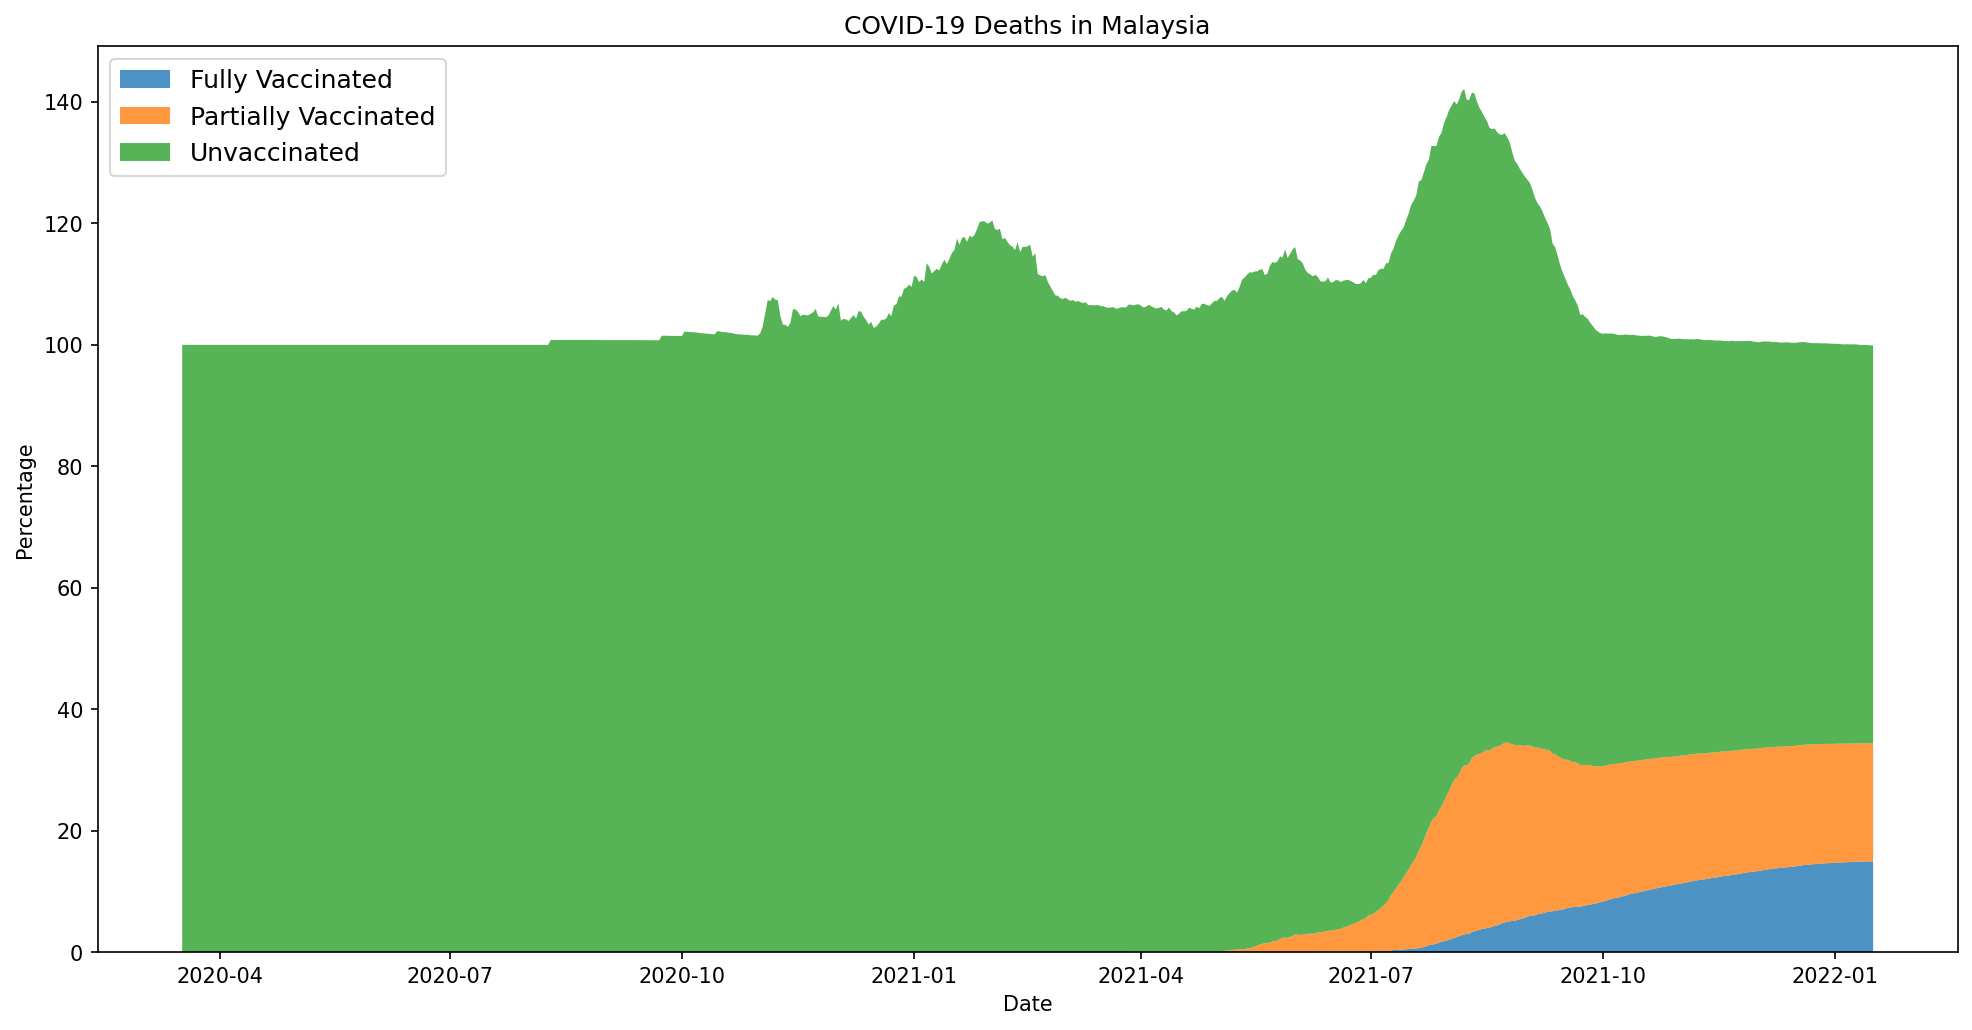

In [20]:
#Finding the proportion of vaccinated people vs unvaccinated people who have died due to Covid

# Create new column on percentage of vax/pvax/fvax death based on daily death.
cumsumtot = np.cumsum(totaldeath['deaths_new'])
cumsumfvax = np.cumsum(totaldeath['deaths_fvax'])
cumsumpvax = np.cumsum(totaldeath['deaths_pvax'])
cumsumunvax = np.cumsum(totaldeath['deaths_unvax'])

totaldeath['cumsumtot'] = np.cumsum(totaldeath['deaths_new'])
totaldeath ['deathfvaxrate'] = cumsumfvax/cumsumtot *100
totaldeath ['deathpvaxrate'] = cumsumpvax/cumsumtot *100
totaldeath ['deathunvaxrate'] = cumsumunvax/cumsumtot *100

# Plot chart
plt.figure(figsize=(16, 8), dpi=150)
plt.stackplot(totaldeath.index,
              [totaldeath['deathfvaxrate'], totaldeath['deathpvaxrate'],
               totaldeath['deathunvaxrate']],
              labels=['Fully Vaccinated', 'Partially Vaccinated', 'Unvaccinated'],
              alpha=0.8)

# Add labels
plt.title ('COVID-19 Deaths in Malaysia')
plt.xlabel ('Date')
plt.ylabel ('Percentage')
plt.legend(loc=2, fontsize='large')
plt.show()

# Need to use actual date of death to get 100% since vaccinated status follows actual day of death. No need to include in final report.

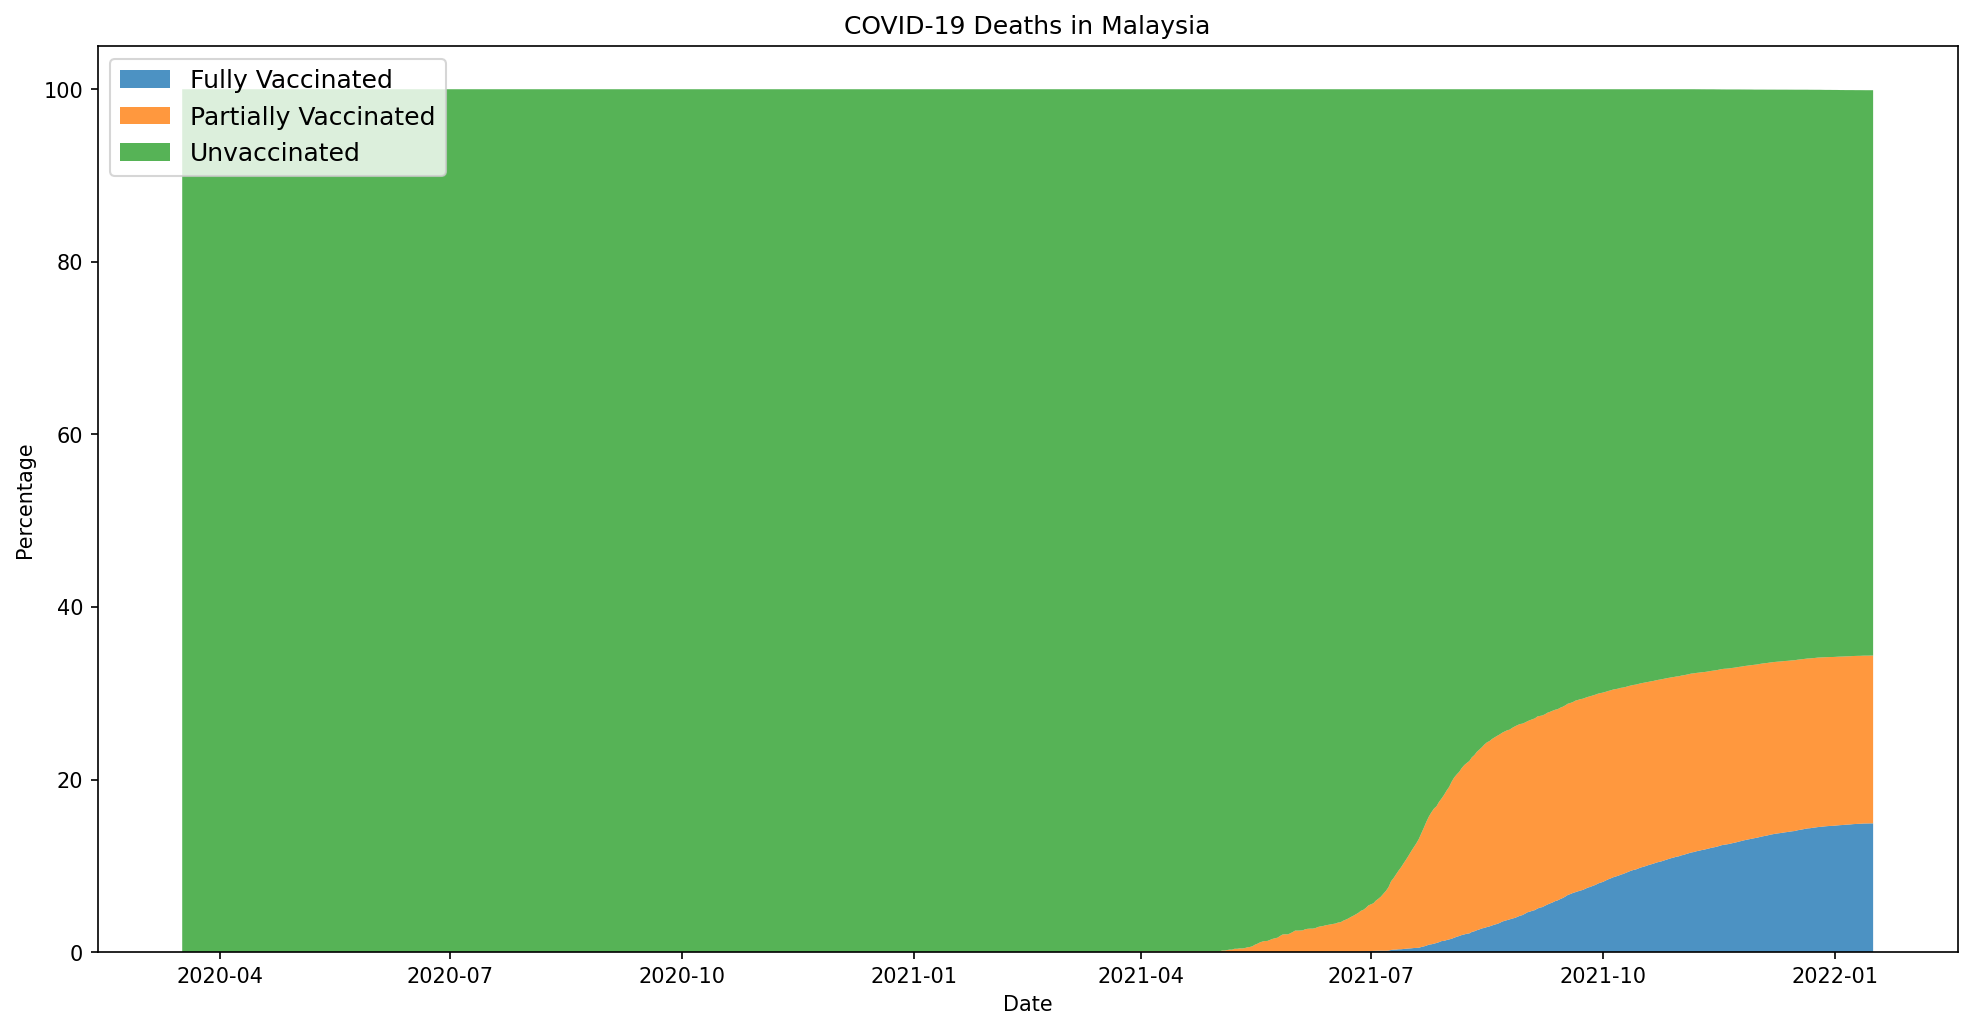

In [21]:
#Finding the proportion of vaccinated people vs unvaccinated people who have died due to Covid

cumsumtot = np.cumsum(totaldeath['deaths_new_dod'])
cumsumfvax = np.cumsum(totaldeath['deaths_fvax'])
cumsumpvax = np.cumsum(totaldeath['deaths_pvax'])
cumsumunvax = np.cumsum(totaldeath['deaths_unvax'])

totaldeath['cumsumtot'] = np.cumsum(totaldeath['deaths_new_dod'])
totaldeath ['deathfvaxrate'] = cumsumfvax/cumsumtot *100
totaldeath ['deathpvaxrate'] = cumsumpvax/cumsumtot *100
totaldeath ['deathunvaxrate'] = cumsumunvax/cumsumtot *100

plt.figure(figsize=(16, 8), dpi=150)
plt.stackplot(totaldeath.index,
              [totaldeath['deathfvaxrate'], totaldeath['deathpvaxrate'],
               totaldeath['deathunvaxrate']],
              labels=['Fully Vaccinated', 'Partially Vaccinated', 'Unvaccinated'],
              alpha=0.8)

# Add labels
plt.title ('COVID-19 Deaths in Malaysia')
plt.xlabel ('Date')
plt.ylabel ('Percentage')
plt.legend(loc=2, fontsize='large')
plt.show()

# Difficult to explain. Increasing death among vaccinated due to increasing vaccination rate. Exclude from final report.